In [7]:
%pip install numpy
%pip install matplotlib
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Cemal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Cemal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Cemal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [9]:
# Defining the 8 u120 instances
problems = [
  
  {
    "name": "u120_00",
    "capacity": 150,
    "best": 48,
    "items": [42,69,67,57,93,90,38,36,45,42,33,79,27,57,44,84,86,92,46,38,85,33,82,73,49,70,59,23,57,72,74,69,33,42,28,46,30,64,29,74,41,49,55,98,80,32,25,38,82,30,35,39,57,84,62,50,55,27,30,36,20,78,47,26,45,41,58,98,91,96,73,84,37,93,91,43,73,85,81,79,71,80,76,83,41,78,70,23,42,87,43,84,60,55,49,78,73,62,36,44,94,69,32,96,70,84,58,78,25,80,58,66,83,24,98,60,42,43,43,39]
  },
  {
    "name": "u120_01",
    "capacity": 150,
    "best": 49,
    "items": [97,57,81,62,75,81,23,43,50,38,60,58,70,88,36,90,37,45,45,39,44,53,70,24,82,81,47,97,35,65,74,68,49,55,52,94,95,29,99,20,22,25,49,46,98,59,98,60,23,72,33,98,80,95,78,57,67,53,47,53,36,38,92,30,80,32,97,39,80,72,55,41,60,67,53,65,95,20,66,78,98,47,100,85,53,53,67,27,22,61,43,52,76,64,61,29,30,46,79,66,27,79,98,90,22,75,57,67,36,70,99,48,43,45,71,100,88,48,27,39]
  },
  {
    "name": "u120_02",
    "capacity": 150,
    "best": 46,
    "items": [38,100,60,42,20,69,24,23,92,32,84,36,65,84,34,68,64,33,69,27,47,21,85,88,59,61,50,53,37,75,64,84,74,57,83,28,31,97,61,36,46,37,96,80,53,51,68,90,64,81,66,67,80,37,92,67,64,31,94,45,80,28,76,29,64,38,48,40,29,44,81,35,51,48,67,24,46,38,76,22,30,67,45,41,29,41,79,21,25,90,62,34,73,50,79,66,59,42,90,79,70,66,80,35,62,98,97,37,32,75,91,91,48,26,23,32,100,46,29,26]
  },
  {
    "name": "u120_03",
    "capacity": 150,
    "best": 49,
    "items": [29,26,83,82,92,95,87,63,57,100,63,65,81,46,42,95,90,80,53,27,84,40,22,97,20,73,63,95,46,42,47,40,26,88,49,24,92,87,68,95,34,82,84,43,54,73,66,32,62,48,99,90,86,28,25,25,89,67,96,35,33,70,40,59,32,94,34,86,35,45,25,76,80,42,91,44,91,97,60,29,45,37,61,54,78,56,74,74,45,21,96,37,75,100,58,84,85,56,54,71,52,79,43,35,27,70,31,47,35,26,30,97,90,80,58,60,73,46,71,39]
  },
  {
    "name": "u120_04",
    "capacity": 150,
    "best": 50,
    "items": [42,98,27,21,71,71,78,76,57,24,91,84,35,25,77,96,97,89,30,86,81,39,75,66,85,36,60,56,50,75,75,37,87,95,21,99,42,57,31,37,42,40,69,91,45,97,84,90,52,43,68,53,37,65,79,73,92,87,20,20,73,42,52,20,24,76,71,72,21,21,82,92,78,87,50,41,31,73,89,59,88,40,71,69,45,57,49,68,84,32,69,77,92,98,57,39,32,23,99,91,48,21,70,43,73,69,65,57,67,28,84,42,61,92,82,34,74,55,60,69]
  },
  {
    "name": "u120_05",
    "capacity": 150,
    "best": 48,
    "items": [26,25,67,77,67,79,47,84,50,21,87,83,44,88,78,53,78,37,47,52,32,88,85,82,55,41,60,66,78,72,34,64,20,60,100,62,80,34,68,38,32,32,37,82,98,90,58,97,56,34,70,39,56,69,36,20,99,84,53,27,88,53,42,45,42,31,54,60,55,27,36,31,39,91,45,97,26,80,41,56,70,97,48,87,23,32,75,100,97,51,78,78,21,72,72,79,46,30,48,27,95,48,67,58,46,92,21,82,91,40,56,24,94,44,91,92,81,24,84,44]
  },
  {
    "name": "u120_06",
    "capacity": 150,
    "best": 48,
    "items": [83,37,98,85,88,95,29,35,100,55,48,27,20,66,62,52,88,59,97,91,81,81,86,48,43,60,72,88,90,48,38,60,53,55,90,48,55,57,59,25,51,22,43,31,52,89,96,58,63,27,46,43,30,44,71,66,64,28,83,88,42,92,95,36,24,62,44,82,59,31,96,44,61,78,72,62,76,65,22,41,27,85,80,72,100,29,27,43,83,32,33,53,95,99,20,23,72,50,50,27,89,53,75,81,34,27,69,48,84,37,69,54,51,49,49,54,100,55,45,83]
  },
  {
    "name": "u120_07",
    "capacity": 150,
    "best": 49,
    "items": [61,96,91,37,53,76,50,66,70,87,92,35,53,95,47,56,55,86,32,99,83,88,41,63,77,60,66,53,79,81,96,34,99,47,74,87,44,77,52,99,69,64,94,38,69,61,98,40,84,89,49,64,53,41,34,85,35,55,61,68,100,75,98,36,44,57,24,60,45,48,60,94,71,70,64,62,93,20,69,37,63,61,26,54,89,46,54,50,32,71,62,40,26,59,62,27,60,50,74,34,40,70,56,23,66,57,43,45,65,25,82,82,37,66,47,44,94,23,24,51]
  }
]

with open("binpack_u120.json", "w") as f:
    json.dump(problems, f, indent=2)




In [10]:
# Bin Packing using Ant Colony Optimization (ACO)


 Running instance: u120_00
Iteration 1/200 -> Best bins: 49
Iteration 2/200 -> Best bins: 49
Iteration 3/200 -> Best bins: 49
Iteration 4/200 -> Best bins: 49
Iteration 5/200 -> Best bins: 49
Iteration 6/200 -> Best bins: 49
Iteration 7/200 -> Best bins: 49
Iteration 8/200 -> Best bins: 49
Iteration 9/200 -> Best bins: 49
Iteration 10/200 -> Best bins: 49
Iteration 11/200 -> Best bins: 49
Iteration 12/200 -> Best bins: 49
Iteration 13/200 -> Best bins: 49
Iteration 14/200 -> Best bins: 49
Iteration 15/200 -> Best bins: 48
Iteration 16/200 -> Best bins: 48
Iteration 17/200 -> Best bins: 48
Iteration 18/200 -> Best bins: 48
Iteration 19/200 -> Best bins: 48
Iteration 20/200 -> Best bins: 48
Iteration 21/200 -> Best bins: 48
Iteration 22/200 -> Best bins: 48
Iteration 23/200 -> Best bins: 48
Iteration 24/200 -> Best bins: 48
Iteration 25/200 -> Best bins: 48
Iteration 26/200 -> Best bins: 48
Iteration 27/200 -> Best bins: 48
Iteration 28/200 -> Best bins: 48
Iteration 29/200 -> Best bins

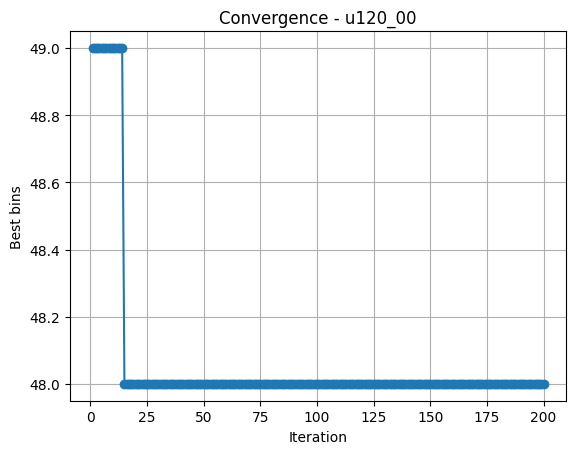

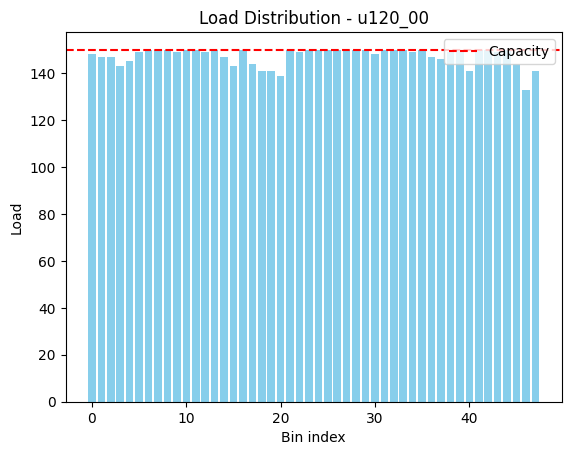


 Running instance: u120_01
Iteration 1/200 -> Best bins: 49
Iteration 2/200 -> Best bins: 49
Iteration 3/200 -> Best bins: 49
Iteration 4/200 -> Best bins: 49
Iteration 5/200 -> Best bins: 49
Iteration 6/200 -> Best bins: 49
Iteration 7/200 -> Best bins: 49
Iteration 8/200 -> Best bins: 49
Iteration 9/200 -> Best bins: 49
Iteration 10/200 -> Best bins: 49
Iteration 11/200 -> Best bins: 49
Iteration 12/200 -> Best bins: 49
Iteration 13/200 -> Best bins: 49
Iteration 14/200 -> Best bins: 49
Iteration 15/200 -> Best bins: 49
Iteration 16/200 -> Best bins: 49
Iteration 17/200 -> Best bins: 49
Iteration 18/200 -> Best bins: 49
Iteration 19/200 -> Best bins: 49
Iteration 20/200 -> Best bins: 49
Iteration 21/200 -> Best bins: 49
Iteration 22/200 -> Best bins: 49
Iteration 23/200 -> Best bins: 49
Iteration 24/200 -> Best bins: 49
Iteration 25/200 -> Best bins: 49
Iteration 26/200 -> Best bins: 49
Iteration 27/200 -> Best bins: 49
Iteration 28/200 -> Best bins: 49
Iteration 29/200 -> Best bins

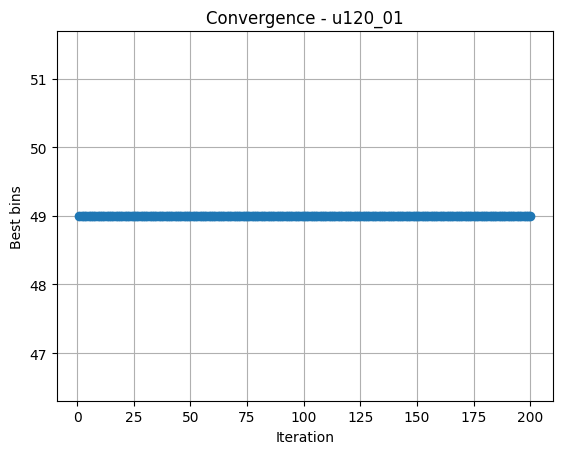

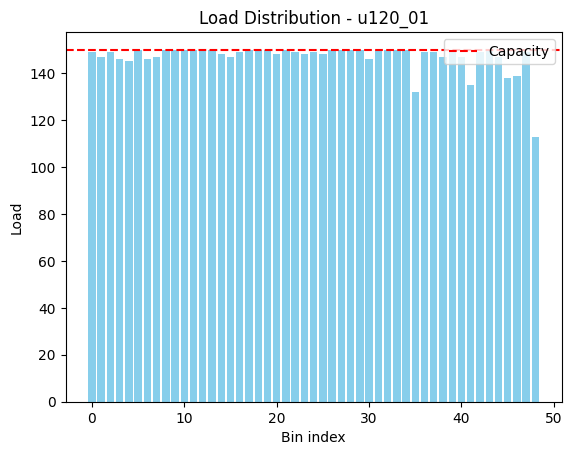


 Running instance: u120_02
Iteration 1/200 -> Best bins: 47
Iteration 2/200 -> Best bins: 47
Iteration 3/200 -> Best bins: 47
Iteration 4/200 -> Best bins: 47
Iteration 5/200 -> Best bins: 47
Iteration 6/200 -> Best bins: 47
Iteration 7/200 -> Best bins: 47
Iteration 8/200 -> Best bins: 47
Iteration 9/200 -> Best bins: 47
Iteration 10/200 -> Best bins: 47
Iteration 11/200 -> Best bins: 47
Iteration 12/200 -> Best bins: 47
Iteration 13/200 -> Best bins: 47
Iteration 14/200 -> Best bins: 47
Iteration 15/200 -> Best bins: 47
Iteration 16/200 -> Best bins: 47
Iteration 17/200 -> Best bins: 47
Iteration 18/200 -> Best bins: 47
Iteration 19/200 -> Best bins: 47
Iteration 20/200 -> Best bins: 47
Iteration 21/200 -> Best bins: 47
Iteration 22/200 -> Best bins: 47
Iteration 23/200 -> Best bins: 47
Iteration 24/200 -> Best bins: 47
Iteration 25/200 -> Best bins: 47
Iteration 26/200 -> Best bins: 47
Iteration 27/200 -> Best bins: 47
Iteration 28/200 -> Best bins: 47
Iteration 29/200 -> Best bins

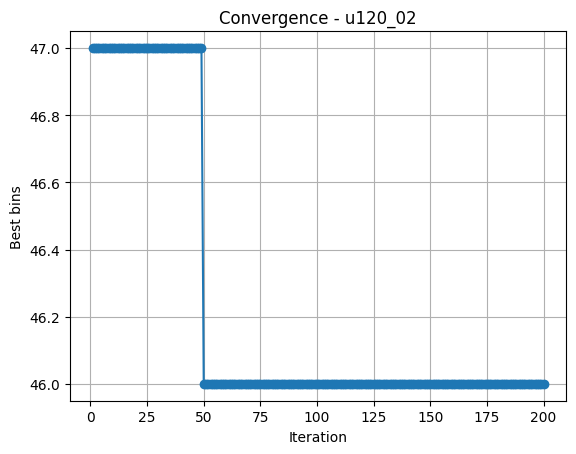

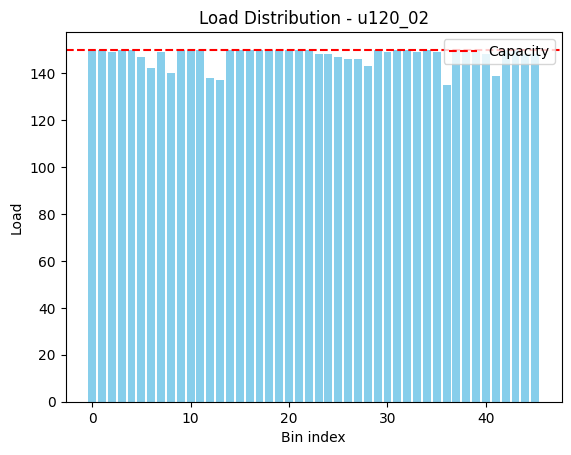


 Running instance: u120_03
Iteration 1/200 -> Best bins: 51
Iteration 2/200 -> Best bins: 51
Iteration 3/200 -> Best bins: 51
Iteration 4/200 -> Best bins: 51
Iteration 5/200 -> Best bins: 51
Iteration 6/200 -> Best bins: 51
Iteration 7/200 -> Best bins: 51
Iteration 8/200 -> Best bins: 51
Iteration 9/200 -> Best bins: 51
Iteration 10/200 -> Best bins: 51
Iteration 11/200 -> Best bins: 51
Iteration 12/200 -> Best bins: 51
Iteration 13/200 -> Best bins: 51
Iteration 14/200 -> Best bins: 51
Iteration 15/200 -> Best bins: 51
Iteration 16/200 -> Best bins: 51
Iteration 17/200 -> Best bins: 50
Iteration 18/200 -> Best bins: 50
Iteration 19/200 -> Best bins: 50
Iteration 20/200 -> Best bins: 50
Iteration 21/200 -> Best bins: 50
Iteration 22/200 -> Best bins: 50
Iteration 23/200 -> Best bins: 50
Iteration 24/200 -> Best bins: 50
Iteration 25/200 -> Best bins: 50
Iteration 26/200 -> Best bins: 50
Iteration 27/200 -> Best bins: 50
Iteration 28/200 -> Best bins: 50
Iteration 29/200 -> Best bins

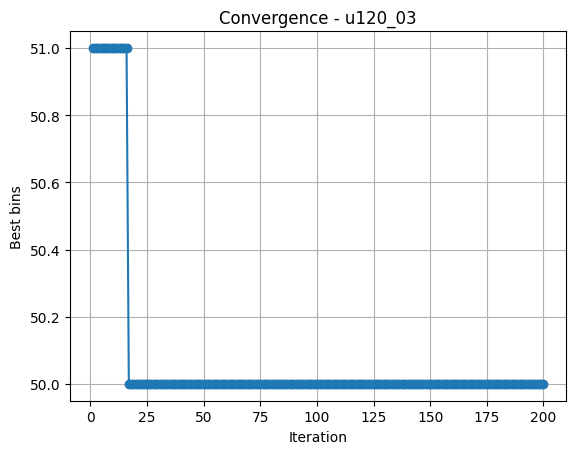

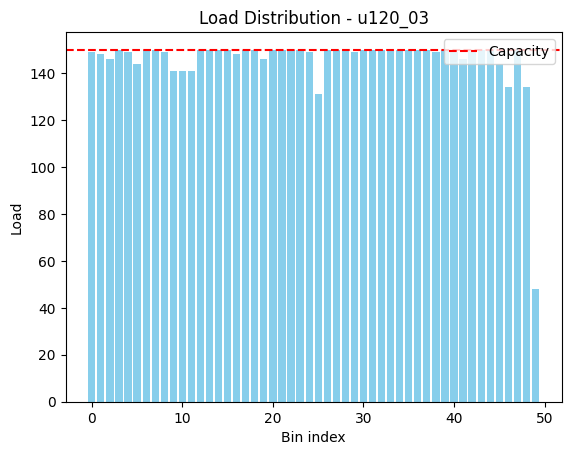


 Running instance: u120_04
Iteration 1/200 -> Best bins: 51
Iteration 2/200 -> Best bins: 51
Iteration 3/200 -> Best bins: 51
Iteration 4/200 -> Best bins: 51
Iteration 5/200 -> Best bins: 51
Iteration 6/200 -> Best bins: 51
Iteration 7/200 -> Best bins: 51
Iteration 8/200 -> Best bins: 51
Iteration 9/200 -> Best bins: 51
Iteration 10/200 -> Best bins: 51
Iteration 11/200 -> Best bins: 51
Iteration 12/200 -> Best bins: 51
Iteration 13/200 -> Best bins: 51
Iteration 14/200 -> Best bins: 51
Iteration 15/200 -> Best bins: 51
Iteration 16/200 -> Best bins: 51
Iteration 17/200 -> Best bins: 51
Iteration 18/200 -> Best bins: 51
Iteration 19/200 -> Best bins: 51
Iteration 20/200 -> Best bins: 51
Iteration 21/200 -> Best bins: 51
Iteration 22/200 -> Best bins: 51
Iteration 23/200 -> Best bins: 51
Iteration 24/200 -> Best bins: 50
Iteration 25/200 -> Best bins: 50
Iteration 26/200 -> Best bins: 50
Iteration 27/200 -> Best bins: 50
Iteration 28/200 -> Best bins: 50
Iteration 29/200 -> Best bins

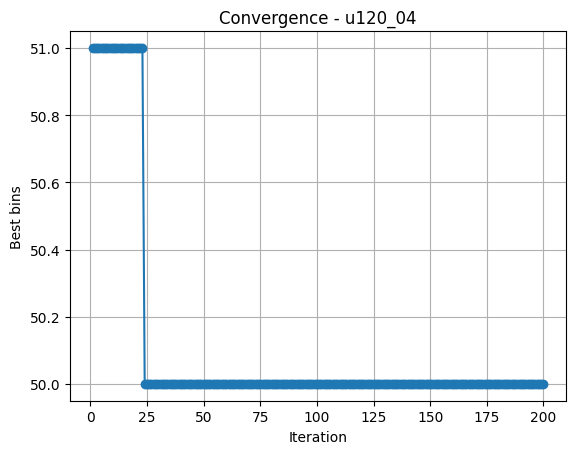

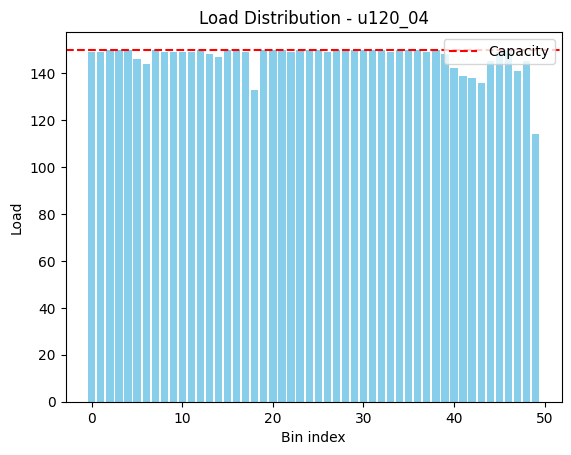


 Running instance: u120_05
Iteration 1/200 -> Best bins: 49
Iteration 2/200 -> Best bins: 49
Iteration 3/200 -> Best bins: 49
Iteration 4/200 -> Best bins: 49
Iteration 5/200 -> Best bins: 49
Iteration 6/200 -> Best bins: 49
Iteration 7/200 -> Best bins: 49
Iteration 8/200 -> Best bins: 49
Iteration 9/200 -> Best bins: 49
Iteration 10/200 -> Best bins: 49
Iteration 11/200 -> Best bins: 49
Iteration 12/200 -> Best bins: 49
Iteration 13/200 -> Best bins: 49
Iteration 14/200 -> Best bins: 49
Iteration 15/200 -> Best bins: 49
Iteration 16/200 -> Best bins: 49
Iteration 17/200 -> Best bins: 49
Iteration 18/200 -> Best bins: 49
Iteration 19/200 -> Best bins: 49
Iteration 20/200 -> Best bins: 49
Iteration 21/200 -> Best bins: 49
Iteration 22/200 -> Best bins: 49
Iteration 23/200 -> Best bins: 49
Iteration 24/200 -> Best bins: 49
Iteration 25/200 -> Best bins: 49
Iteration 26/200 -> Best bins: 49
Iteration 27/200 -> Best bins: 49
Iteration 28/200 -> Best bins: 49
Iteration 29/200 -> Best bins

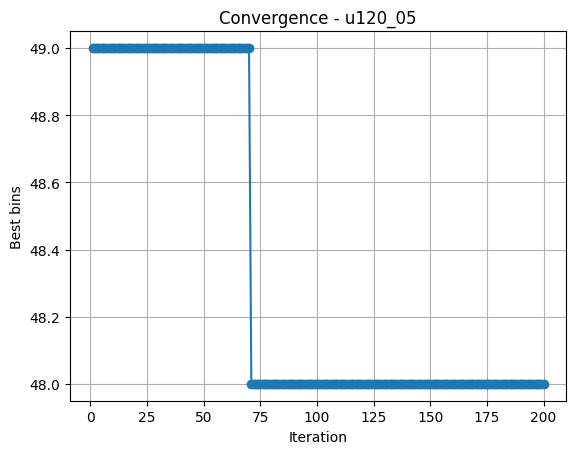

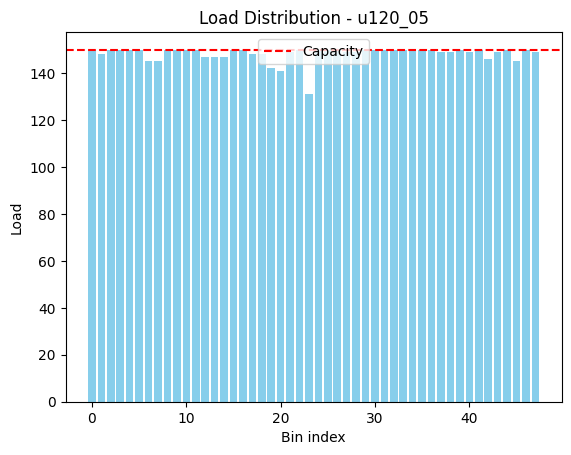


 Running instance: u120_06
Iteration 1/200 -> Best bins: 49
Iteration 2/200 -> Best bins: 49
Iteration 3/200 -> Best bins: 49
Iteration 4/200 -> Best bins: 49
Iteration 5/200 -> Best bins: 49
Iteration 6/200 -> Best bins: 49
Iteration 7/200 -> Best bins: 49
Iteration 8/200 -> Best bins: 49
Iteration 9/200 -> Best bins: 49
Iteration 10/200 -> Best bins: 49
Iteration 11/200 -> Best bins: 49
Iteration 12/200 -> Best bins: 49
Iteration 13/200 -> Best bins: 49
Iteration 14/200 -> Best bins: 49
Iteration 15/200 -> Best bins: 49
Iteration 16/200 -> Best bins: 49
Iteration 17/200 -> Best bins: 49
Iteration 18/200 -> Best bins: 49
Iteration 19/200 -> Best bins: 49
Iteration 20/200 -> Best bins: 49
Iteration 21/200 -> Best bins: 49
Iteration 22/200 -> Best bins: 49
Iteration 23/200 -> Best bins: 49
Iteration 24/200 -> Best bins: 49
Iteration 25/200 -> Best bins: 49
Iteration 26/200 -> Best bins: 49
Iteration 27/200 -> Best bins: 49
Iteration 28/200 -> Best bins: 49
Iteration 29/200 -> Best bins

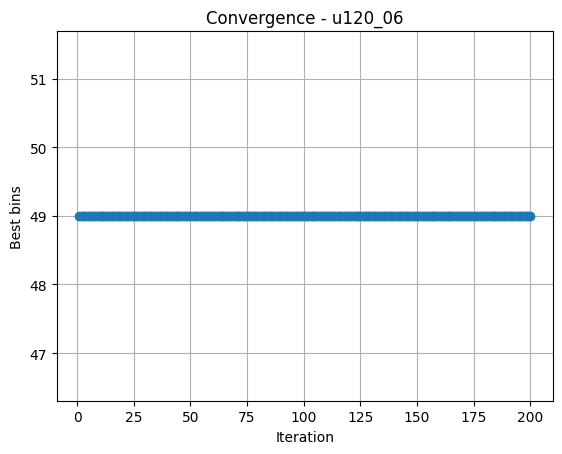

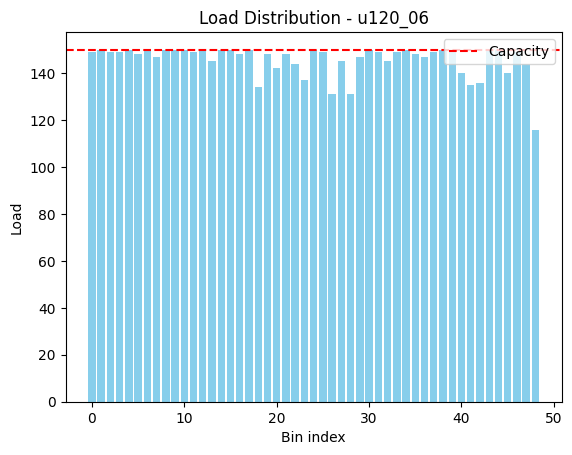


 Running instance: u120_07
Iteration 1/200 -> Best bins: 50
Iteration 2/200 -> Best bins: 50
Iteration 3/200 -> Best bins: 50
Iteration 4/200 -> Best bins: 50
Iteration 5/200 -> Best bins: 50
Iteration 6/200 -> Best bins: 50
Iteration 7/200 -> Best bins: 50
Iteration 8/200 -> Best bins: 50
Iteration 9/200 -> Best bins: 50
Iteration 10/200 -> Best bins: 50
Iteration 11/200 -> Best bins: 50
Iteration 12/200 -> Best bins: 50
Iteration 13/200 -> Best bins: 50
Iteration 14/200 -> Best bins: 50
Iteration 15/200 -> Best bins: 50
Iteration 16/200 -> Best bins: 50
Iteration 17/200 -> Best bins: 50
Iteration 18/200 -> Best bins: 50
Iteration 19/200 -> Best bins: 50
Iteration 20/200 -> Best bins: 50
Iteration 21/200 -> Best bins: 50
Iteration 22/200 -> Best bins: 50
Iteration 23/200 -> Best bins: 50
Iteration 24/200 -> Best bins: 50
Iteration 25/200 -> Best bins: 50
Iteration 26/200 -> Best bins: 50
Iteration 27/200 -> Best bins: 50
Iteration 28/200 -> Best bins: 50
Iteration 29/200 -> Best bins

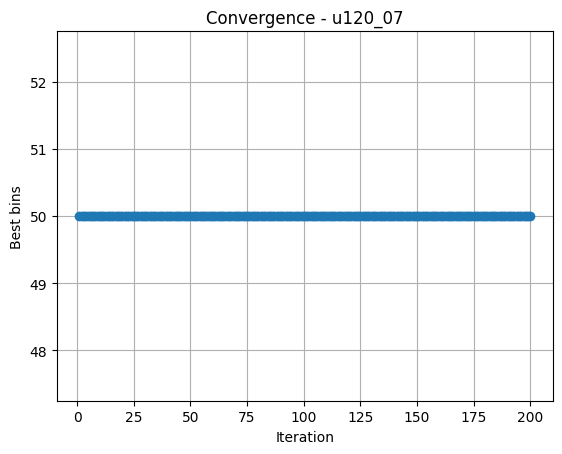

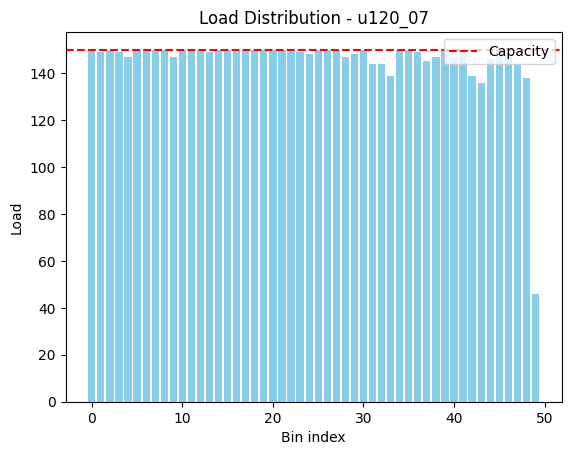


=== Summary Table ===
  Instance  Best Known  ACO Bins  Unused Space  Runtime (s)
0  u120_00          48        48           122       10.158
1  u120_01          49        49           145        8.406
2  u120_02          46        46           106        8.324
3  u120_03          49        50           215       10.056
4  u120_04          50        50           146        9.350
5  u120_05          48        48            78       10.215
6  u120_06          48        49           213        9.112
7  u120_07          49        50           205        7.978


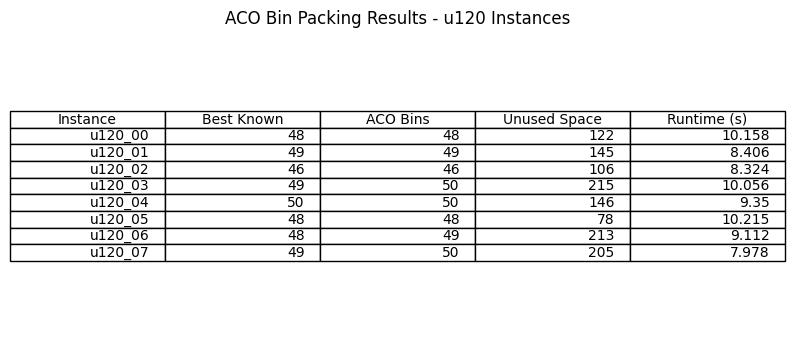

In [11]:
class AntColony:
   def __init__(self, sizes, capacity, n_ants, n_best, n_iterations, decay, alpha, beta, ph_depo, R_max, temperature, shuffle_prob):

    self.sizes = sizes
    self.capacity = capacity
    self.n = len(sizes)

    self.n_ants = n_ants
    self.n_best = n_best
    self.n_iterations = n_iterations
    self.decay = decay
    self.alpha = alpha
    self.beta = beta
    self.ph_depo = ph_depo
    self.R_max = R_max

    # Pheromone levels for ranks 0 to R_max
    self.pheromone = np.ones(R_max + 1)

    # Temperature for scaling probabilities
    self.temperature = temperature

    # Probability to shuffle item order
    self.shuffle_prob = shuffle_prob

    # Helper functions

   def heuristic(self, residual):
      """Calculate heuristic value based on residual space."""
      return 1.0 / (1.0 + residual)

   def choice_probabilities(self, feasible_bins, new_residual):
      """Calculate choice probabilities for feasible bins and a new bin."""
      options = []

      # Existing bins
      for rank, residual in feasible_bins:
        limited_rank = min(rank, self.R_max)
        pheromone_strength = self.pheromone[limited_rank] ** self.alpha
        heuristic_value = self.heuristic(residual) ** self.beta
        options.append((limited_rank, pheromone_strength * heuristic_value))

      # New bin
      pheromone_new = self.pheromone[0] ** self.alpha
      heuristic_new = self.heuristic(new_residual) ** self.beta
      options.append((0, pheromone_new * heuristic_new))

      # Convert to numpy array for temperature scaling
      ranks, scores = zip(*options)
      scores = np.array(scores)

      probs = scores ** (1 / self.temperature)
      probs /= probs.sum()
      return list(zip(ranks, probs))

   def sample_rank(self, probabilities):
      """Choose a rank based on the given probabilities."""
      random_value = np.random.random()
      running_total = 0.0
      for rank, prob in probabilities:
        running_total += prob
        if random_value <= running_total:
          return rank
      return probabilities[-1][0]

   def construct_solution(self):
      """Construct a solution for one ant."""
      bins = [] # List of bins with items
      loads = [] # Total load of each bin
      ranks_used = [] # Track ranks chosen for later pheromone update

      order=list(range(self.n))
      if np.random.random() < self.shuffle_prob:
        np.random.shuffle(order)
      else:
        order.sort(key=lambda i: -self.sizes[i])

      for item in order:
        item_size = self.sizes[item]

        # Find feasible bins
        feasible = []
        for bin_index in range(len(loads)):
          if loads[bin_index] + item_size <= self.capacity:
            residual_after = self.capacity - (loads[bin_index] + item_size)
            feasible.append((bin_index, residual_after))
        feasible_ranked = [(i + 1, res) for i, (_, res) in enumerate(sorted(feasible,  key=lambda x: x[1]))]

        # Calculate probabilities and sample rank
        new_residual = self.capacity - item_size
        probabilities = self.choice_probabilities(feasible_ranked, new_residual)
        chosen_rank = self.sample_rank(probabilities)
        ranks_used.append(chosen_rank)

        # Place item
        if chosen_rank == 0:
           bins.append([item])
           loads.append(item_size)
        else:
          index = min(chosen_rank - 1, len(feasible) - 1)
          bin_index = feasible[index][0]
          bins[bin_index].append(item)
          loads[bin_index] += item_size
      
      num_bins = len(bins)
      total_unused = num_bins * self.capacity - sum(loads)
      return bins, loads, ranks_used, num_bins, total_unused

   def run(self):
    """Execute the ACO algorithm to solve the bin packing problem."""
    best_solution = None
    best_bins = float("inf")
    best_progress = []

    for iteration in range(self.n_iterations):
      all_solutions = []
      for _ in range(self.n_ants):
        bins, loads, ranks_used, num_bins, total_unused = self.construct_solution()
        all_solutions.append((bins, loads, ranks_used, num_bins, total_unused))

      # Sort by number of bins used and unused space
      all_solutions.sort(key=lambda x: (x[3], x[4]))

      # Evaporate pheromone
      self.pheromone *= self.decay

      # Deposit pheromone for the best solutions
      for i in range(self.n_best):
        bins, loads, ranks_used, num_bins, total_unused = all_solutions[i]
        for r in ranks_used:
          self.pheromone[r] += self.ph_depo / num_bins

      # Track the best solution found so far
      best_iteration = all_solutions[0]
      if best_iteration[3] < best_bins:
        best_bins = best_iteration[3]
        best_solution = best_iteration
      best_progress.append(best_bins)

      print(f"Iteration {iteration+1}/{self.n_iterations} -> Best bins: {best_bins}")

    print("\nBest overall solution used", best_bins, "bins")
    bins, loads, _, _, _ = best_solution
    for i, (b, load) in enumerate(zip(bins, loads)):
      print(f" Bin {i}: load={load}, items={[self.sizes[j] for j in b]}")

    return  best_solution, best_progress

# Load JSON dataset
with open("binpack_u120.json", "r") as f:
    problems = json.load(f)

results = []

# Run ACO on each problem instance
for prob in problems:
    print(f"\n Running instance: {prob['name']}")
    sizes = prob["items"]
    capacity = prob["capacity"]
    best_known = prob["best"]

    start_time = time.time()

    ant_colony = AntColony(
        sizes, capacity,
        n_ants=50,
        n_best=5,
        n_iterations=200,
        decay=1,
        alpha=3,
        beta=1,
        ph_depo = 1,
        R_max=10,
        temperature=2.0,
        shuffle_prob=0.3
    )

    best_solution, progress = ant_colony.run()
    bins, loads, ranks_used, num_bins, total_unused = best_solution

    end_time = time.time()
    runtime = round(end_time - start_time, 3)

    plt.figure()
    plt.plot(range(1, len(progress) + 1), progress, marker='o')
    plt.xlabel("Iteration")
    plt.ylabel("Best bins")
    plt.title(f"Convergence - {prob['name']}")
    plt.grid(True)
    plt.show()

    plt.figure()
    plt.bar(range(len(loads)), loads, color='skyblue')
    plt.axhline(capacity, color='red', linestyle='--', label='Capacity')
    plt.xlabel("Bin index")
    plt.ylabel("Load")
    plt.title(f"Load Distribution - {prob['name']}")
    plt.legend()
    plt.show()

    # Save results for summary table
    results.append({
        "Instance": prob["name"],
        "Best Known": best_known,
        "ACO Bins": num_bins,
        "Unused Space": total_unused,
        "Runtime (s)": runtime
    })

# Display summary table
df = pd.DataFrame(results)
print("\n=== Summary Table ===")
print(df)

# Plot table using matplotlib
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
table_data = df.values
column_labels = df.columns
ax.table(cellText=table_data, colLabels=column_labels, loc='center')
plt.title("ACO Bin Packing Results - u120 Instances")
plt.show()


# Optimizing Classic Benchmark Functions using Particle Swarm Optimization (PSO)

In [12]:
#--- Import Dependencies ---#
import matplotlib.pyplot as plt
import numpy as np
import time
import os

In [13]:
#--- Sphere function (minimize) ---#
def sphere(x):
    return np.sum(np.square(x))


#--- Rosenbrock function (minimize) ---#
def rosenbrock(x):
    total = 0
    for i in range(len(x) - 1):
        part1 = 100*(x[i+1] - x[i]**2)**2
        part2 = (1-x[i])**2
        total += (part1 + part2)

    return total


#--- Rastrigin function (minimize) ---#
def rastrigin(x):
    total = 10 * len(x) + np.sum(np.square(x) - 10 * np.cos(2 * np.pi * x))
    return total


#--- Ackley function (minimize) ---#
def ackley(x):
    n = len(x)
    part1 = -20*np.exp(-0.2*np.sqrt(1/n*np.sum(np.square(x))))
    part2 = -np.exp(1/n * np.sum(np.cos(2*np.pi*x)))
    return part1 + part2 + 20 + np.exp(1)

In [14]:
#--- Main ---#
class Particle:
    def __init__(self, bounds):
        self.num_dimensions = len(bounds)
        self.bounds = bounds
        self.position_i = np.array([np.random.uniform(b[0], b[1]) for b in bounds])  # Current position
        range_size = [b[1] - b[0] for b in bounds]
        self.velocity_i = np.array([np.random.uniform(-0.2*r, 0.2*r) for r in range_size])  # Current velocity
        self.pos_best_i = np.copy(self.position_i)  # Best known position of this particle
        self.err_best_i = np.inf  # Best known fitness of this particle
        self.err_i = np.inf       # Current fitness


    def evaluate (self, costFunc):
        self.err_i = costFunc(self.position_i)
        if self.err_i < self.err_best_i:
            self.pos_best_i = np.copy(self.position_i)
            self.err_best_i = self.err_i


    def update_velocity(self, pos_best_g, inertia_weight=0.7, cognitive_coef=1.5, social_coef=1.5):
        r1 = np.random.random(self.num_dimensions)
        r2 = np.random.random(self.num_dimensions)
        inertia = inertia_weight * self.velocity_i

        cognitive = cognitive_coef * r1 * (self.pos_best_i - self.position_i)
        social = social_coef * r2 * (pos_best_g - self.position_i)
        self.velocity_i = inertia + cognitive + social

        v_max = np.array([0.5 * (b[1] - b[0]) for b in self.bounds])
        self.velocity_i = np.clip(self.velocity_i, -v_max, v_max)


    def update_position(self):
        for i in range(0, self.num_dimensions):
            self.position_i[i] += self.velocity_i[i]

            if self.position_i[i] > self.bounds[i][1]:
                self.position_i[i] = self.bounds[i][1]

            if self.position_i[i] < self.bounds[i][0]:
                self.position_i[i] = self.bounds[i][0]

In [15]:
#--- PSO Loop ---#

class PSO():
    def __init__(self, costFunc, bounds, num_particles=30, max_iterations=300,
                 inertia_weight=0.7, cognitive_coef=1.5, social_coef=1.5, local=False):
        self.costFunc = costFunc
        self.bounds = bounds
        self.num_particles = num_particles
        self.max_iterations = max_iterations
        self.inertia_weight = inertia_weight
        self.cognitive_coef = cognitive_coef
        self.social_coef = social_coef
        self.err_best_g = np.inf
        self.pos_best_g = None
        self.local = local

    def run(self):
        swarm = [Particle(self.bounds) for _ in range(self.num_particles)]
        best_curve = []
        
        for iteration in range(self.max_iterations):
            for particle in swarm:
                particle.evaluate(self.costFunc)
                if particle.err_i < self.err_best_g:
                    self.pos_best_g = np.copy(particle.position_i)
                    self.err_best_g = particle.err_i
            
            best_curve.append(self.err_best_g)

            for idx, particle in enumerate(swarm):
                if self.local == True:
                    left = (idx - 2) % self.num_particles
                    right = (idx + 2) % self.num_particles
                    neighborhood = [swarm[left], swarm[idx], swarm[right]]
                    best_local_particle = min(neighborhood, key=lambda p: p.err_best_i)
                    pos_best_local = np.copy(best_local_particle.pos_best_i)

                    particle.update_velocity(pos_best_local, self.inertia_weight, self.cognitive_coef, self.social_coef)
                
                else:
                    particle.update_velocity(self.pos_best_g, self.inertia_weight, self.cognitive_coef, self.social_coef)
                
                particle.update_position()

            #--- Early stopping condition ---#
            func_name = self.costFunc.__name__.lower()
            if (func_name in ['sphere', 'rosenbrock'] and self.err_best_g < 1e-8) or \
                (func_name in ['rastrigin', 'ackley'] and self.err_best_g < 1e-4):
                #print(f"Stopping early at iteration {iteration} ({func_name})")
                break

            #if iteration == self.max_iterations - 1:
                #print("Maximum number of iterations reached")

        #print("Best position:", self.pos_best_g)
        #print("Best fitness:", self.err_best_g)
        evals = len(best_curve) * self.num_particles
        return self.pos_best_g, self.err_best_g, best_curve, evals



In [16]:
def compare_functions(results, functions, dimensions, save=False):
    os.makedirs("plots", exist_ok=True)

    plt.figure(figsize=(7,5))
    for f in functions:
        curves = results[f]["curves"]
        max_len = max(len(c) for c in curves)
        padded = np.array([np.pad(c, (0, max_len - len(c)), 'edge') for c in curves])
        plt.plot(np.mean(padded, axis=0), label=f)
    plt.title("PSO Convergence Comparison")
    plt.xlabel("Iteration")
    plt.ylabel("Mean best fitness (log scale)")
    plt.yscale("log")
    plt.legend()
    plt.grid(True)

    if save:
        path = os.path.join("plots", f"pso_convergence_comparison_{dimensions}D.png")
        plt.savefig(path, dpi=300, bbox_inches="tight")
        print(f"Saved: {path}")
    plt.show()


def plot_final_fitness_boxplots(results, dimensions, output_dir="plots", save=False):
    """Boxplots of final best fitness across all runs for each benchmark function."""
    os.makedirs(output_dir, exist_ok=True)

    data = []
    labels = []
    for f in results.keys():
        finals = [curve[-1] for curve in results[f]["curves"]]
        data.append(finals)
        labels.append(f)

    plt.figure(figsize=(8, 5))
    plt.boxplot(data, labels=labels, showmeans=True)
    plt.yscale("log")
    plt.title(f"Final Fitness Across 30 Runs ({dimensions}-D)")
    plt.ylabel("Final Best Fitness (log scale)")
    plt.grid(True, alpha=0.6)

    if save:
        path = os.path.join(output_dir, f"final_fitness_boxplot_{dimensions}D.png")
        plt.savefig(path, dpi=300, bbox_inches="tight")
        print(f"Saved: {path}")

    plt.show()


def plot_convergence_summary(results, function_name):
    """Show single-run and mean convergence curves side by side."""
    curves = results[function_name]["curves"]
    max_len = max(len(c) for c in curves)

    # Pad shorter runs (for consistent array shape)
    padded = np.array([np.pad(c, (0, max_len - len(c)), 'edge') for c in curves])
    mean_curve = np.mean(padded, axis=0)
    std_curve = np.std(padded, axis=0)

    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # --- Left: Single run convergence ---
    axes[0].plot(curves[0])
    axes[0].set_title(f"Single Run – {function_name}")
    axes[0].set_xlabel("Iteration")
    axes[0].set_ylabel("Best fitness (gbest)")
    axes[0].set_yscale("log")
    axes[0].grid(True)

    # --- Right: Mean ± Std convergence ---
    axes[1].plot(mean_curve, label="Mean gbest")
    axes[1].fill_between(range(max_len),
                         mean_curve - std_curve,
                         mean_curve + std_curve,
                         color="gray", alpha=0.3, label="±1 Std Dev")
    axes[1].set_title(f"Mean Convergence – {function_name}")
    axes[1].set_xlabel("Iteration")
    axes[1].set_ylabel("Best fitness (gbest)")
    axes[1].set_yscale("log")
    axes[1].grid(True)
    axes[1].legend()

    plt.tight_layout()
    plt.show()



def parameter_study(functions, configs, num_dimensions=10, num_runs=30):
    results = {}

    for costFunc in functions:
        print(f"\nParameter Study – {costFunc.__name__} (n={num_dimensions})")
        if costFunc == rosenbrock:
            bounds = np.array([(-5, 10) for _ in range(num_dimensions)])
        elif costFunc == rastrigin:
            bounds = np.array([(-5.12, 5.12) for _ in range(num_dimensions)])
        elif costFunc == ackley:
            bounds = np.array([(-32.768, 32.768) for _ in range(num_dimensions)])
        else:
            bounds = np.array([(-5.12, 5.12) for _ in range(num_dimensions)])
        func_results = []

        for (omega, c1, c2) in configs:
            fitnesses = []
            for _ in range(num_runs):
                pso = PSO(costFunc, bounds, num_particles=30,
                          inertia_weight=omega, cognitive_coef=c1, social_coef=c2)
                _, best_fit, _, _ = pso.run()
                fitnesses.append(best_fit)

            # Record statistics for this parameter set
            func_results.append({
                "omega": omega,
                "c1": c1,
                "c2": c2,
                "mean": np.mean(fitnesses),
                "std": np.std(fitnesses),
                "best": np.min(fitnesses),
                "worst": np.max(fitnesses)
            })

            #print(f"(ω={omega}, c1={c1}, c2={c2}) → "
             #     f"mean={np.mean(fitnesses):.3e}, std={np.std(fitnesses):.3e}")

        # Store per-function results
        results[costFunc.__name__] = func_results

    return results


def plot_parameter_study(results, save=False, output_dir="plots"):
    """
    Visualize mean fitness across different (ω, c1, c2) settings
    for each benchmark function.
    """
    import os
    os.makedirs(output_dir, exist_ok=True)

    for func_name, configs in results.items():
        omegas = [r["omega"] for r in configs]
        means = [r["mean"] for r in configs]
        stds = [r["std"] for r in configs]
        labels = [f"ω={r['omega']}, c1={r['c1']}, c2={r['c2']}" for r in configs]

        plt.figure(figsize=(8, 5))
        plt.bar(range(len(configs)), means, yerr=stds, capsize=5, color='steelblue', alpha=0.8)
        plt.xticks(range(len(configs)), labels, rotation=25, ha='right')
        plt.yscale("log")
        plt.ylabel("Mean Final Fitness (log scale)")
        plt.title(f"Parameter Study Results – {func_name}")
        plt.grid(axis="y", alpha=0.4)

        if save:
            path = os.path.join(output_dir, f"param_study_{func_name}.png")
            plt.savefig(path, dpi=300, bbox_inches="tight")
            print(f"Saved: {path}")

        plt.show()




def compare_lbest_gbest(costFunc, bounds, num_particles=30, max_iterations=300,
                        inertia_weight=0.7, cognitive_coef=1.5, social_coef=1.5,
                        num_runs=10, output_dir="plots", save=False):
    """
    Compare convergence between local-best (lbest) and global-best (gbest) PSO.

    Parameters:
        costFunc: objective function
        bounds: np.array of variable bounds [(lower, upper), ...]
        num_particles: swarm size
        max_iterations: max iterations per run
        inertia_weight, cognitive_coef, social_coef: PSO parameters
        num_runs: number of independent runs for averaging
        output_dir: directory to save plots
        save: whether to save figure
    """

    os.makedirs(output_dir, exist_ok=True)
    print(f"Comparing lbest vs gbest on {costFunc.__name__}...")

    # --- Run global-best (standard PSO) ---
    from copy import deepcopy

    gbest_curves = []
    for _ in range(num_runs):
        pso_g = PSO(costFunc=costFunc, bounds=deepcopy(bounds),
                    num_particles=num_particles, max_iterations=max_iterations,
                    inertia_weight=inertia_weight, cognitive_coef=cognitive_coef,
                    social_coef=social_coef, local=False)
        _, _, curve_g, _ = pso_g.run()
        gbest_curves.append(curve_g)

    # --- Run local-best variant (ring topology) ---
    lbest_curves = []
    for _ in range(num_runs):
        pso_l = PSO(costFunc=costFunc, bounds=deepcopy(bounds),
                    num_particles=num_particles, max_iterations=max_iterations,
                    inertia_weight=inertia_weight, cognitive_coef=cognitive_coef,
                    social_coef=social_coef, local=True)
        _, _, curve_l, _ = pso_l.run()
        lbest_curves.append(curve_l)

    # --- Prepare curves (pad to equal length) ---
    max_len = max(max(len(c) for c in gbest_curves), max(len(c) for c in lbest_curves))
    pad = lambda c: np.pad(c, (0, max_len - len(c)), 'edge')
    gbest_curves = np.array([pad(c) for c in gbest_curves])
    lbest_curves = np.array([pad(c) for c in lbest_curves])

    gbest_mean, gbest_std = np.mean(gbest_curves, axis=0), np.std(gbest_curves, axis=0)
    lbest_mean, lbest_std = np.mean(lbest_curves, axis=0), np.std(lbest_curves, axis=0)

    # --- Plot ---
    plt.figure(figsize=(7, 5))
    plt.plot(gbest_mean, label="Global Best (gbest)", color="tab:blue")
    plt.fill_between(range(max_len), gbest_mean - gbest_std, gbest_mean + gbest_std,
                     color="tab:blue", alpha=0.2)
    plt.plot(lbest_mean, label="Local Best (lbest)", color="tab:orange")
    plt.fill_between(range(max_len), lbest_mean - lbest_std, lbest_mean + lbest_std,
                     color="tab:orange", alpha=0.2)

    plt.yscale("log")
    plt.xlabel("Iteration")
    plt.ylabel("Best fitness")
    plt.title(f"Global vs Local Best PSO Comparison – {costFunc.__name__}")
    plt.legend()
    plt.grid(True)

    if save:
        path = os.path.join(output_dir, f"gbest_vs_lbest_{costFunc.__name__}.png")
        plt.savefig(path, dpi=300, bbox_inches="tight")
        print(f"Saved: {path}")

    plt.show()


In [17]:
def run_experimental(num_runs=30, num_dimensions=2, local=False):
    results = {}

    functions = [sphere, rosenbrock, rastrigin, ackley]

    for costFunc in functions:
        print(f"\nFunction: {costFunc.__name__}, Dimensions: {num_dimensions}, Runs: {num_runs}, Local: {local}")
        if costFunc == rosenbrock:
            bounds = np.array([(-5, 10) for _ in range(num_dimensions)])
        elif costFunc == rastrigin:
            bounds = np.array([(-5.12, 5.12) for _ in range(num_dimensions)])
        elif costFunc == ackley:
            bounds = np.array([(-32.768, 32.768) for _ in range(num_dimensions)])
        else:
            bounds = np.array([(-5.12, 5.12) for _ in range(num_dimensions)])

        fitnesses, all_curves, evaluations = [], [], []
        start_time = time.time()

        for _ in range(num_runs):
            n_particles = 50 if num_dimensions == 30 else 30
            pso = PSO(costFunc=costFunc, bounds=bounds, num_particles=n_particles, local=local)
            best_pos, best_fit, best_curve, evals = pso.run()
            fitnesses.append(best_fit)
            evaluations.append(evals)
            all_curves.append(best_curve)


        runtime = time.time() - start_time
        success_threshold = 1e-8 if costFunc in [sphere, rosenbrock] else 1e-4
        success_rate = np.mean(np.array(fitnesses) <= success_threshold)

        results[costFunc.__name__] = {
            "mean": np.mean(fitnesses),
            "median": np.median(fitnesses),
            "std": np.std(fitnesses),
            "best": np.min(fitnesses),
            "worst": np.max(fitnesses),
            "success_rate": success_rate,
            "mean_evaluations": np.mean(evaluations),
            "runtime_sec": runtime,
            "curves": all_curves,
            "fitnesses": fitnesses
        }

        print(f"→ mean: {np.mean(fitnesses):.3e}, std: {np.std(fitnesses):.3e}, "
              f"best: {np.min(fitnesses):.3e}, worst: {np.max(fitnesses):.3e}, "
              f"success_rate: {success_rate*100:.2f}, time: {runtime:.2f}s")

        plot_convergence_summary(results, costFunc.__name__)
        if costFunc == ackley:
            print("\n\n")

    return results

### Run the experiment


Function: sphere, Dimensions: 2, Runs: 30, Local: False
→ mean: 5.153e-09, std: 3.222e-09, best: 2.591e-11, worst: 9.975e-09, success_rate: 100.00, time: 0.61s


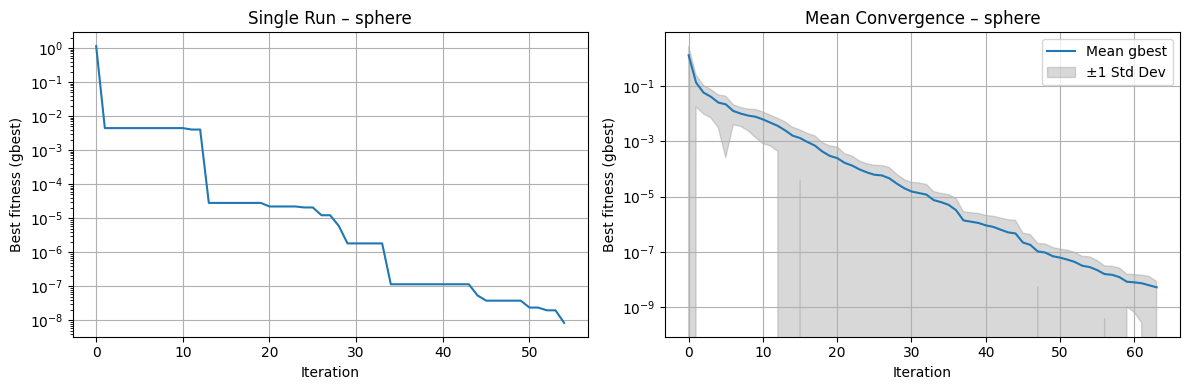


Function: rosenbrock, Dimensions: 2, Runs: 30, Local: False
→ mean: 6.400e-09, std: 2.852e-09, best: 1.467e-09, worst: 9.982e-09, success_rate: 100.00, time: 1.91s


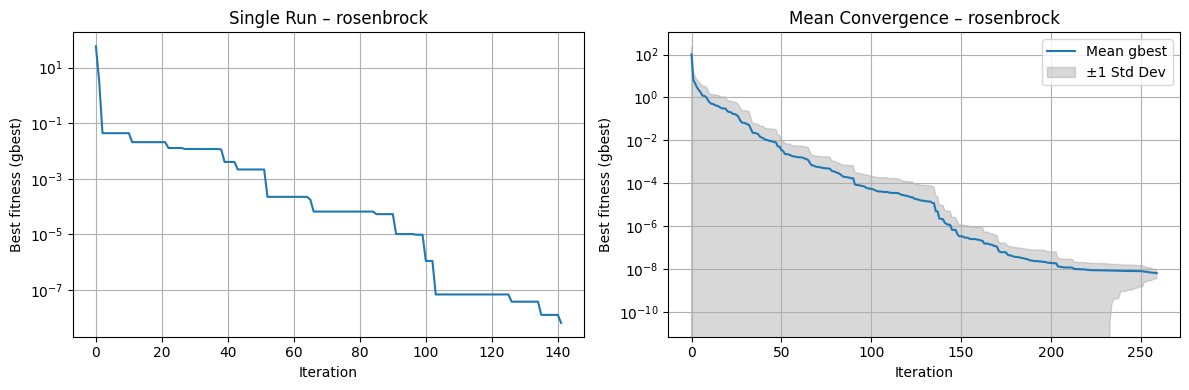


Function: rastrigin, Dimensions: 2, Runs: 30, Local: False
→ mean: 3.322e-02, std: 1.786e-01, best: 3.416e-06, worst: 9.950e-01, success_rate: 96.67, time: 0.75s


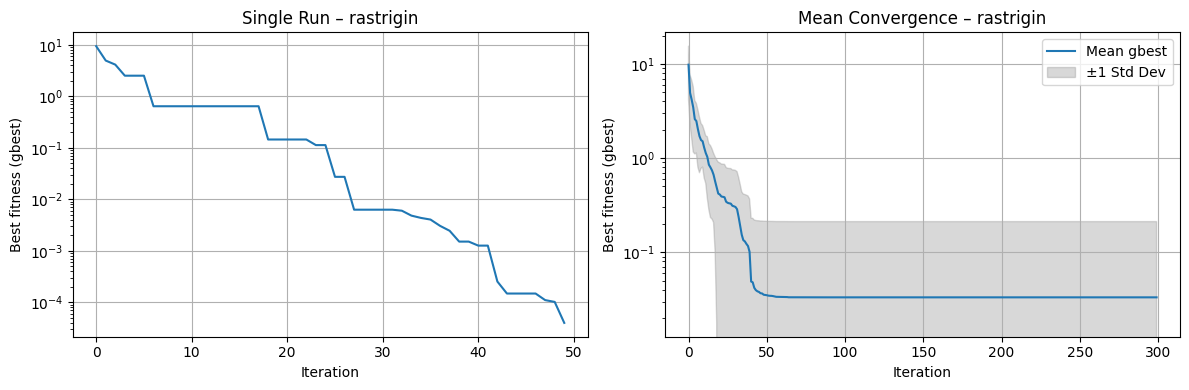


Function: ackley, Dimensions: 2, Runs: 30, Local: False
→ mean: 6.388e-05, std: 2.182e-05, best: 1.848e-05, worst: 9.797e-05, success_rate: 100.00, time: 1.20s


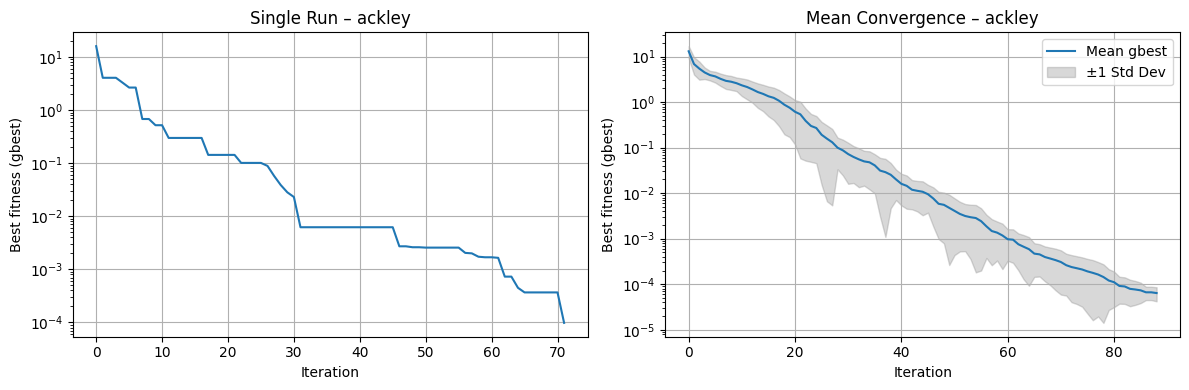

C:\Users\Cemal\AppData\Local\Temp\ipykernel_21256\3208322258.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showmeans=True)


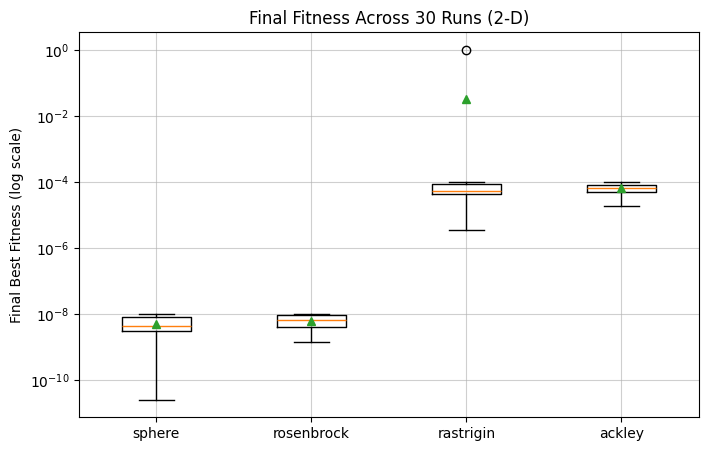

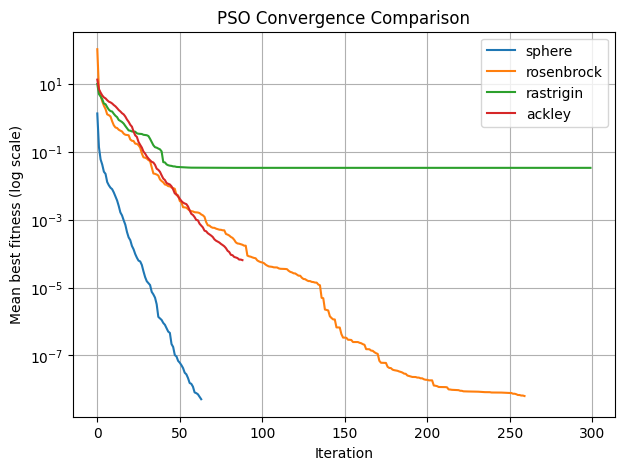





Function: sphere, Dimensions: 10, Runs: 30, Local: False
→ mean: 8.362e-09, std: 1.391e-09, best: 4.302e-09, worst: 9.934e-09, success_rate: 100.00, time: 2.50s


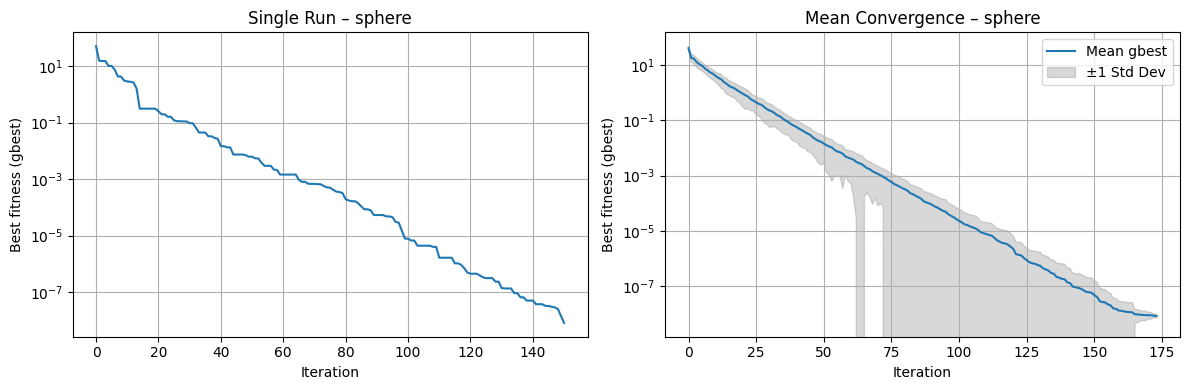


Function: rosenbrock, Dimensions: 10, Runs: 30, Local: False
→ mean: 8.146e+00, std: 1.996e+01, best: 1.885e-03, worst: 1.152e+02, success_rate: 0.00, time: 8.91s


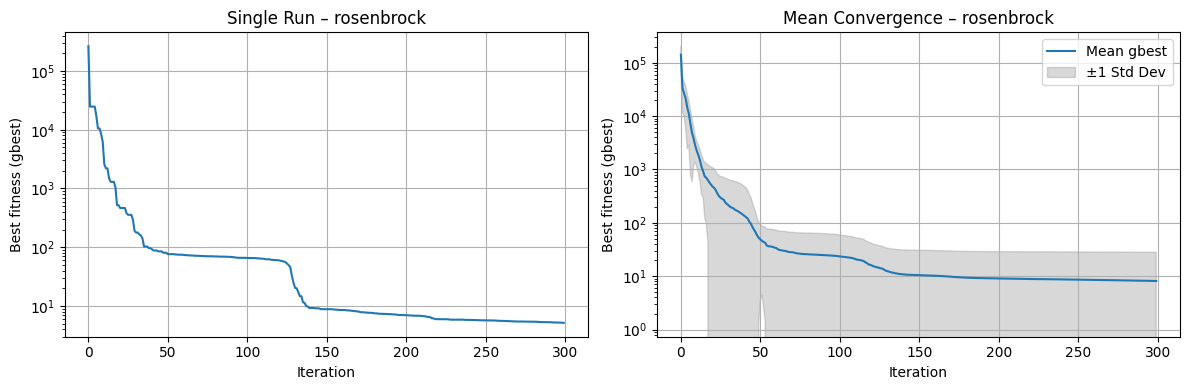


Function: rastrigin, Dimensions: 10, Runs: 30, Local: False
→ mean: 8.842e+00, std: 4.141e+00, best: 2.985e+00, worst: 1.890e+01, success_rate: 0.00, time: 5.36s


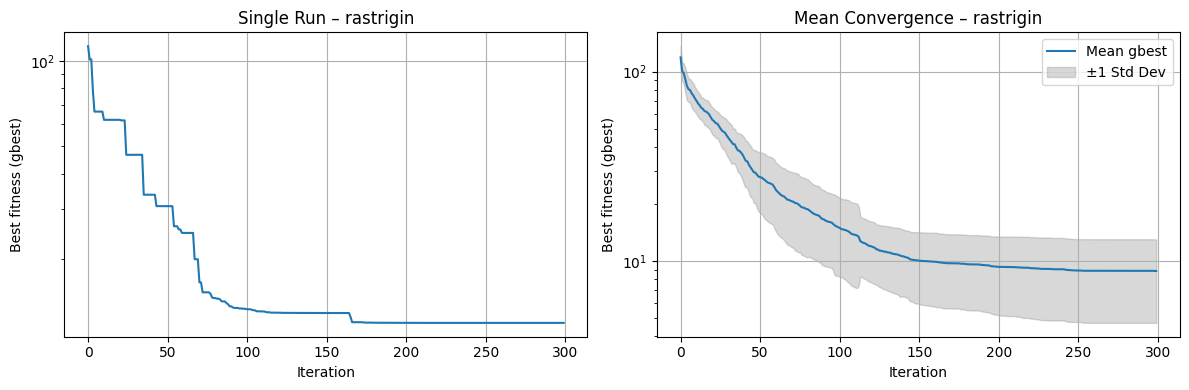


Function: ackley, Dimensions: 10, Runs: 30, Local: False
→ mean: 1.057e-01, std: 4.104e-01, best: 6.792e-05, worst: 2.013e+00, success_rate: 93.33, time: 4.19s


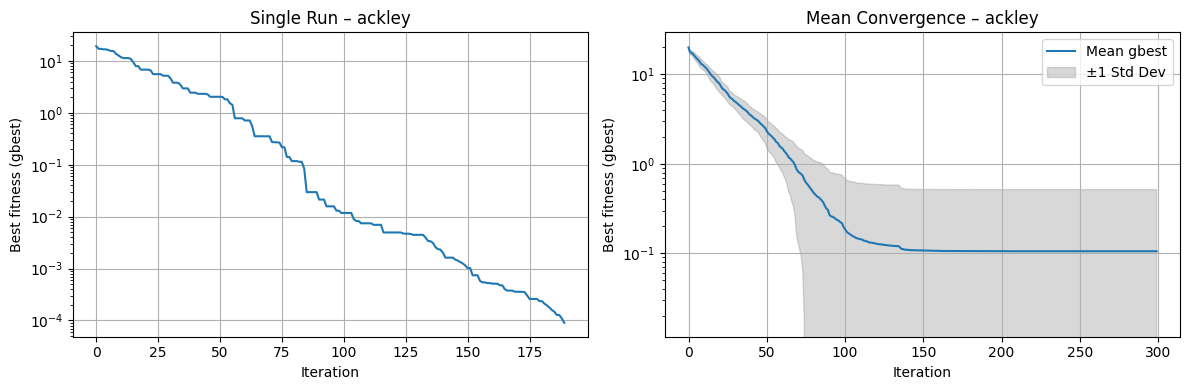

C:\Users\Cemal\AppData\Local\Temp\ipykernel_21256\3208322258.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showmeans=True)


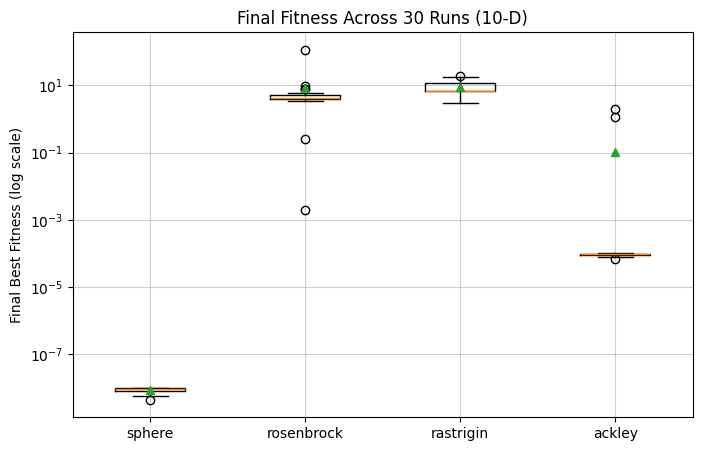

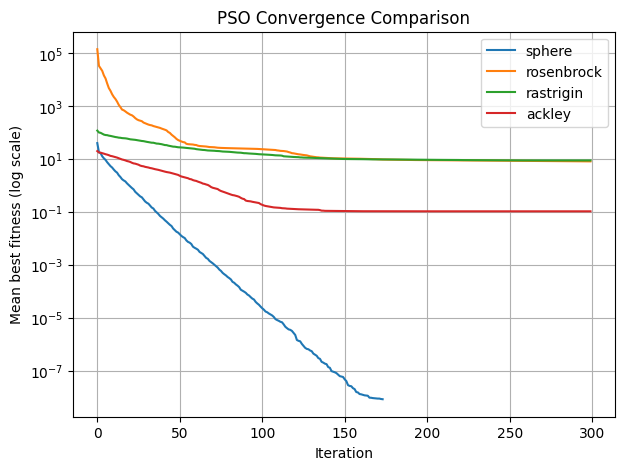





Function: sphere, Dimensions: 30, Runs: 30, Local: False
→ mean: 5.924e-06, std: 1.946e-05, best: 8.657e-08, worst: 1.093e-04, success_rate: 0.00, time: 14.72s


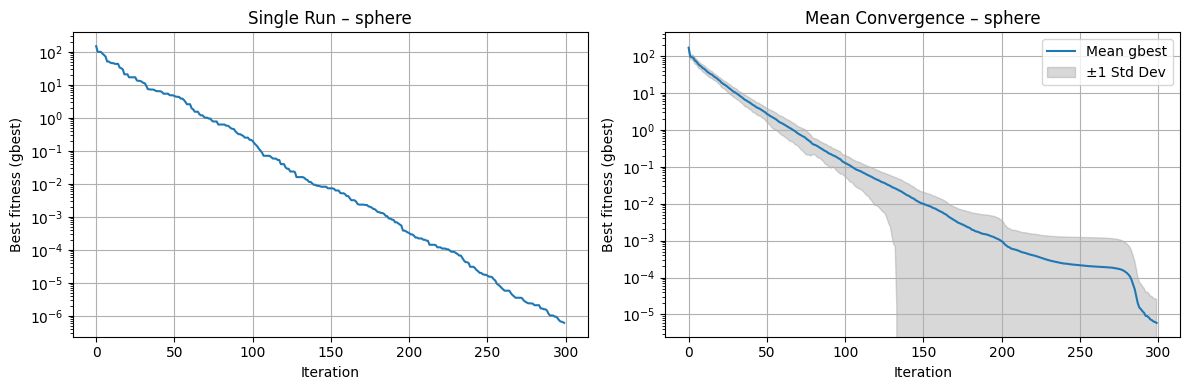


Function: rosenbrock, Dimensions: 30, Runs: 30, Local: False
→ mean: 9.442e+03, std: 2.519e+04, best: 2.118e+01, worst: 1.111e+05, success_rate: 0.00, time: 35.37s


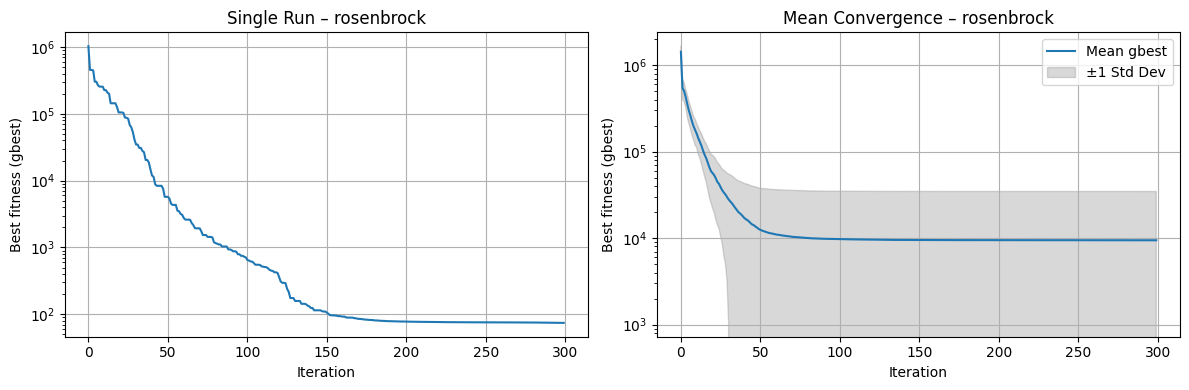


Function: rastrigin, Dimensions: 30, Runs: 30, Local: False
→ mean: 8.954e+01, std: 2.564e+01, best: 4.180e+01, worst: 1.443e+02, success_rate: 0.00, time: 16.01s


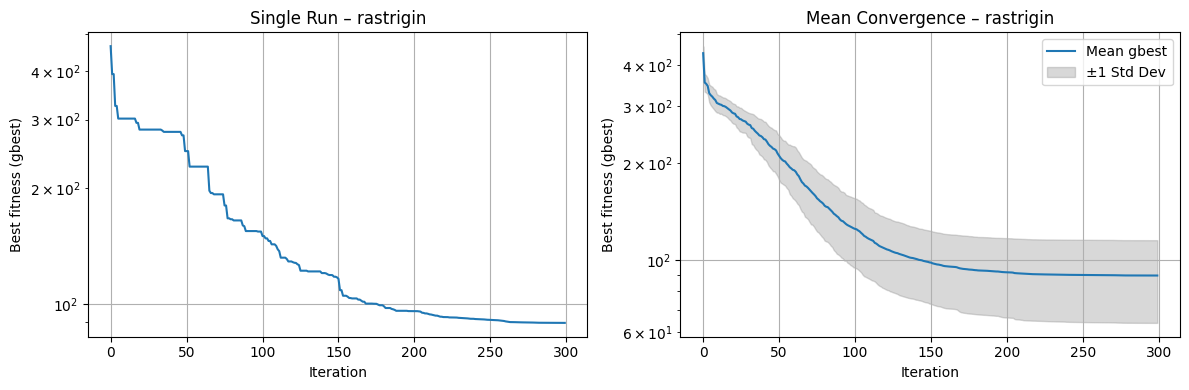


Function: ackley, Dimensions: 30, Runs: 30, Local: False
→ mean: 1.805e+00, std: 1.103e+00, best: 9.673e-03, worst: 4.424e+00, success_rate: 0.00, time: 17.47s


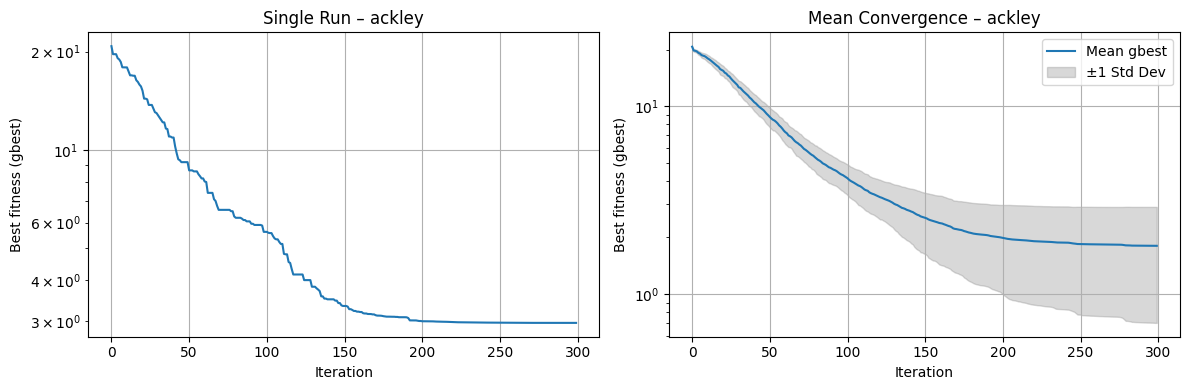

C:\Users\Cemal\AppData\Local\Temp\ipykernel_21256\3208322258.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showmeans=True)


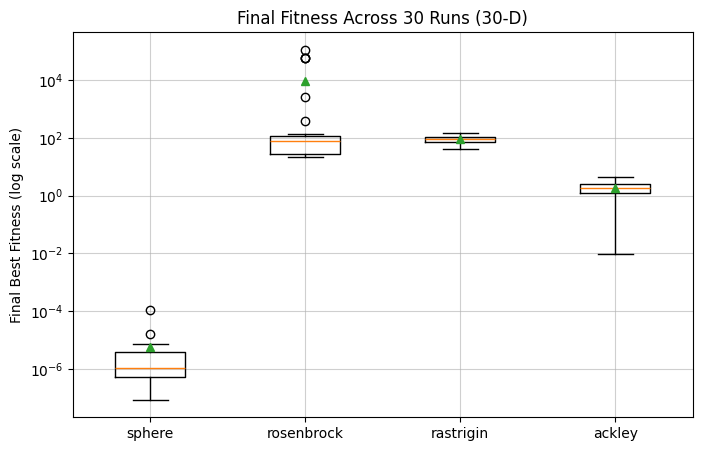

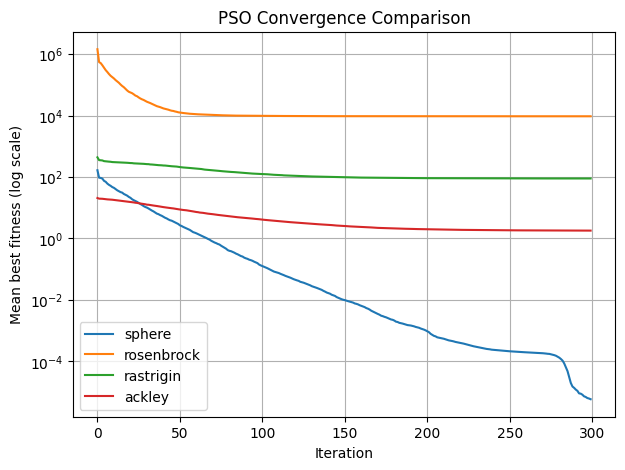

In [18]:
for num_dimensions in [2, 10, 30]:
  results = run_experimental(num_dimensions=num_dimensions, local=False)
  plot_final_fitness_boxplots(results, dimensions=num_dimensions)
  compare_functions(results, dimensions=num_dimensions,functions=["sphere", "rosenbrock", "rastrigin", "ackley"])
  print("\n\n")

### Compare local best & global best

Comparing lbest vs gbest on ackley...


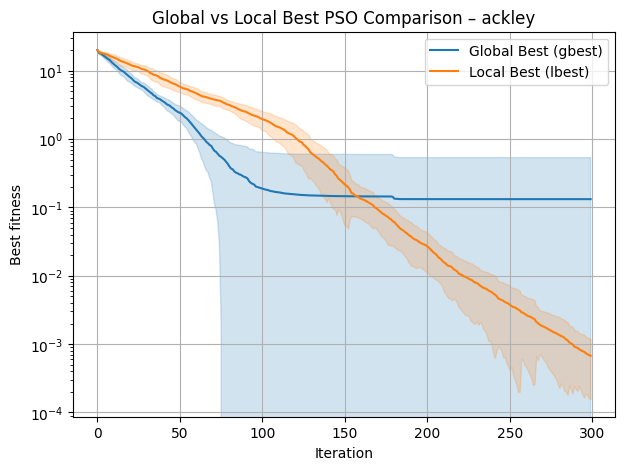

In [19]:
bounds = np.array([(-32.768, 32.768) for _ in range(10)])
compare_lbest_gbest(ackley, bounds, num_runs=30)

### Perform parameter study

In [20]:
np.random.seed(42)
num_dimensions = 10
bounds = [(-5.12, 5.12)]*num_dimensions
configs = [(0.7, 1.5, 1.5), (0.4, 2.0, 2.0), (0.9, 1.0, 1.0), (0.7, 2.0, 1.0), (0.7, 1.0, 2.0)]

param_results = parameter_study([sphere, rosenbrock, rastrigin, ackley], configs, num_dimensions)

for func_name, res in param_results.items():
    print(f"\n--- {func_name.upper()} ---")
    df = pd.DataFrame(res)
    print(df.to_string(index=False, float_format=lambda x: f"{x:.3e}"))


Parameter Study – sphere (n=10)

Parameter Study – rosenbrock (n=10)

Parameter Study – rastrigin (n=10)

Parameter Study – ackley (n=10)

--- SPHERE ---
    omega        c1        c2      mean       std      best     worst
7.000e-01 1.500e+00 1.500e+00 8.299e-09 1.531e-09 3.571e-09 9.990e-09
4.000e-01 2.000e+00 2.000e+00 8.381e-09 1.081e-09 5.917e-09 9.917e-09
9.000e-01 1.000e+00 1.000e+00 1.999e-04 1.436e-04 2.133e-05 5.230e-04
7.000e-01 2.000e+00 1.000e+00 7.748e-09 2.080e-09 2.573e-09 9.996e-09
7.000e-01 1.000e+00 2.000e+00 7.663e-09 1.840e-09 3.542e-09 9.980e-09

--- ROSENBROCK ---
    omega        c1        c2      mean       std      best     worst
7.000e-01 1.500e+00 1.500e+00 7.956e+00 2.004e+01 9.641e-03 1.152e+02
4.000e-01 2.000e+00 2.000e+00 1.247e+01 2.366e+01 4.571e-01 9.407e+01
9.000e-01 1.000e+00 1.000e+00 1.699e+02 4.988e+02 3.171e+00 2.506e+03
7.000e-01 2.000e+00 1.000e+00 6.824e+00 1.671e+01 5.604e-01 9.635e+01
7.000e-01 1.000e+00 2.000e+00 3.544e+02 8.452e+02 1.041

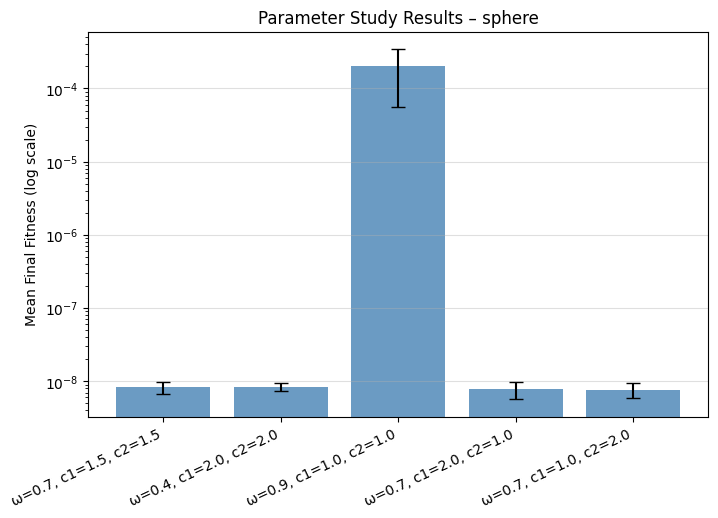

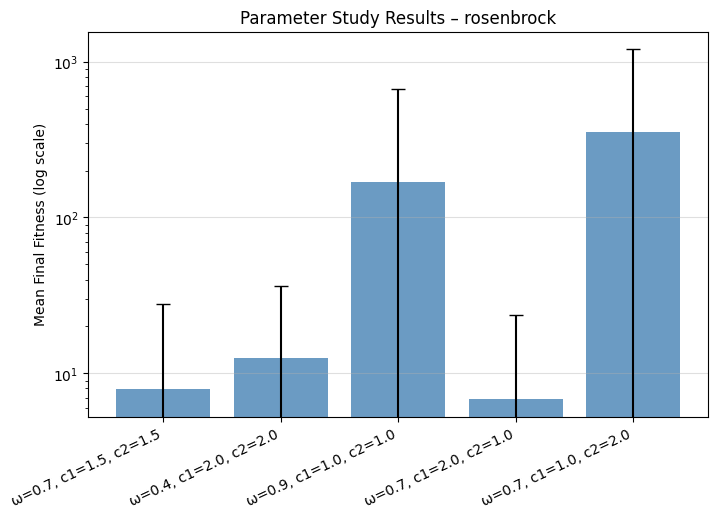

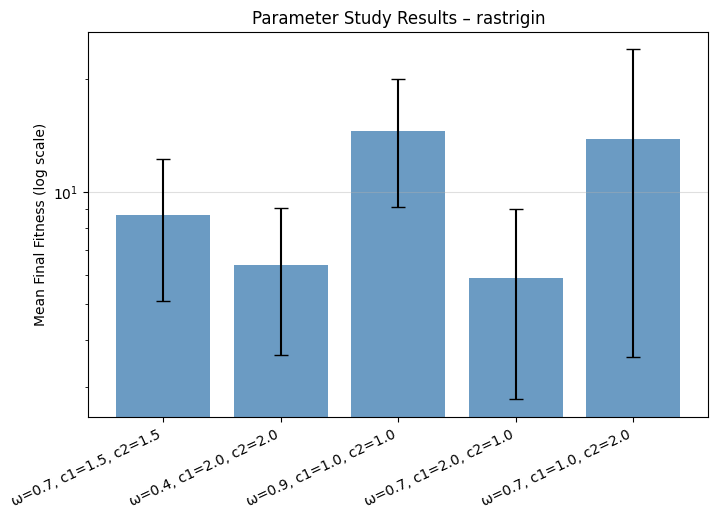

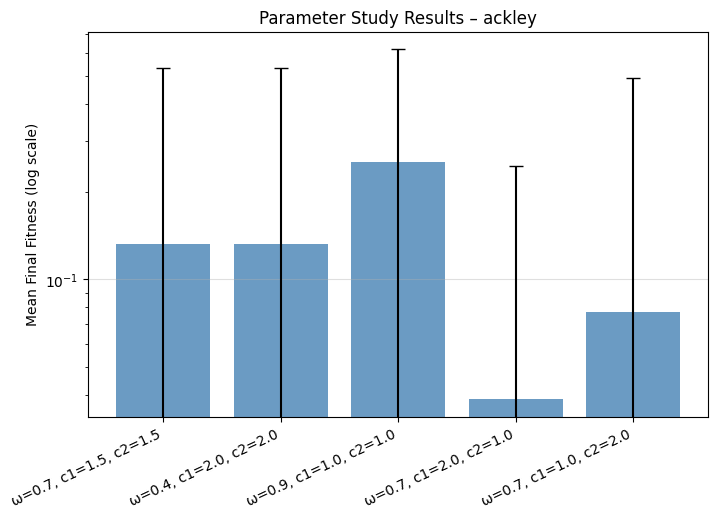

In [21]:
plot_parameter_study(param_results, output_dir="plots")

### SOLVING 0-1 KNAPSACK PROBLEM USING BEES ALGORITHM (BA) 

In [22]:
datasets = {
    "WEING1": {
        "num_constraints": 2,
        "num_items": 28,
        "values": [
            1898, 440, 22507, 270, 14148, 3100, 4650, 30800, 615, 4975,
            1160, 4225, 510, 11880, 479, 440, 490, 330, 110, 560,
            24355, 2885, 11748, 4550, 750, 3720, 1950, 10500
        ],
        "weights": [
            [45, 0, 85, 150, 65, 95, 30, 0, 170, 0, 40, 25, 20, 0, 0, 25, 0, 0, 25, 0, 165, 0, 85, 0, 0, 0, 100],
            [30, 20, 125, 5, 80, 25, 35, 73, 12, 15, 15, 40, 5, 10, 10, 12, 10, 9, 0, 20, 60, 40, 50, 36, 49, 40, 19, 150]
        ],
        "capacities": [600, 600],
        "optimal": 141278
    },

    "WEING2": {
        "num_constraints": 2,
        "num_items": 28,
        "values": [
            1898, 440, 22507, 270, 14148, 3100, 4650, 30800, 615, 4975,
            1160, 4225, 510, 11880, 479, 440, 490, 330, 110, 560,
            24355, 2885, 11748, 4550, 750, 3720, 1950, 10500
        ],
        "weights": [
            [45, 0, 85, 150, 65, 95, 30, 0, 170, 0, 40, 25, 20, 0, 0, 25, 0, 0, 25, 0, 165, 0, 85, 0, 0, 0, 100],
            [30, 20, 125, 5, 80, 25, 35, 73, 12, 15, 15, 40, 5, 10, 10, 12, 10, 9, 0, 20, 60, 40, 50, 36, 49, 40, 19, 150]
        ],
        "capacities": [500, 500],
        "optimal": 130883
    },

    "WEISH01": {
        "num_constraints": 5,
        "num_items": 30,
        "values": [
            360, 83, 59, 130, 431, 67, 230, 52, 93, 125,
            670, 892, 600, 38, 48, 147, 78, 256, 63, 17,
            120, 164, 432, 35, 92, 110, 22, 42, 50, 323
        ],
        "weights": [
            [7, 0, 30, 22, 80, 94, 11, 81, 70, 64, 59, 18, 0, 36, 3, 8, 15, 42, 9, 0, 42, 47, 52, 32, 26, 48, 55, 6, 29, 84],
            [8, 66, 98, 50, 0, 30, 0, 88, 15, 37, 26, 72, 61, 57, 17, 27, 83, 3, 9, 66, 97, 42, 2, 44, 71, 11, 25, 74, 90, 20],
            [3, 74, 88, 50, 55, 19, 0, 6, 30, 62, 17, 81, 25, 46, 67, 28, 36, 8, 1, 52, 19, 37, 27, 62, 39, 84, 16, 14, 21, 5],
            [21, 40, 0, 6, 82, 91, 43, 30, 62, 91, 10, 41, 12, 4, 80, 77, 98, 50, 78, 35, 7, 1, 96, 67, 85, 4, 23, 38, 2, 57],
            [94, 86, 80, 92, 31, 17, 65, 51, 46, 66, 44, 3, 26, 0, 39, 20, 11, 6, 55, 70, 11, 75, 82, 35, 47, 99, 5, 14, 23, 38]
        ],
        "capacities": [400, 500, 500, 600, 600],
        "optimal": 4554
    },

    "WEISH02": {
        "num_constraints": 5,
        "num_items": 30,
        "values": [
            360, 83, 59, 130, 431, 67, 230, 52, 93, 125,
            670, 892, 600, 38, 48, 147, 78, 256, 63, 17,
            120, 164, 432, 35, 92, 110, 22, 42, 50, 323
        ],
        "weights": [
            [7, 0, 30, 22, 80, 94, 11, 81, 70, 64, 59, 18, 0, 36, 3, 8, 15, 42, 9, 0, 42, 47, 52, 32, 26, 48, 55, 6, 29, 84],
            [8, 66, 98, 50, 0, 30, 0, 88, 15, 37, 26, 72, 61, 57, 17, 27, 83, 3, 9, 66, 97, 42, 2, 44, 71, 11, 25, 74, 90, 20],
            [3, 74, 88, 50, 55, 19, 0, 6, 30, 62, 17, 81, 25, 46, 67, 28, 36, 8, 1, 52, 19, 37, 27, 62, 39, 84, 16, 14, 21, 5],
            [21, 40, 0, 6, 82, 91, 43, 30, 62, 91, 10, 41, 12, 4, 80, 77, 98, 50, 78, 35, 7, 1, 96, 67, 85, 4, 23, 38, 2, 57],
            [94, 86, 80, 92, 31, 17, 65, 51, 46, 66, 44, 3, 26, 0, 39, 20, 11, 6, 55, 70, 11, 75, 82, 35, 47, 99, 5, 14, 23, 38]
        ],
        "capacities": [370, 650, 460, 980, 870],
        "optimal": 4536
    },

    "WEISH19": {
        "num_constraints": 5,
        "num_items": 70,
        "values": [
            360, 83, 59, 130, 431, 67, 230, 52, 93, 125,
            670, 892, 600, 38, 48, 147, 78, 256, 63, 17,
            120, 164, 432, 35, 92, 110, 22, 42, 50, 323,
            514, 28, 87, 73, 78, 15, 26, 78, 210, 36,
            85, 189, 274, 43, 33, 10, 19, 389, 276, 312,
            94, 68, 73, 192, 41, 163, 16, 40, 195, 138,
            73, 152, 400, 26, 14, 170, 205, 57, 369, 435
        ],
        "weights": [
            [7, 0, 30, 22, 80, 94, 11, 81, 70, 64, 59, 18, 0, 36, 3, 8, 15, 42, 9, 0, 42, 47, 52, 32, 26, 48, 55, 6, 29, 84, 2, 4, 18, 56, 7, 29, 93, 44, 71, 3, 86, 66, 31, 65, 0, 79, 20, 65, 52, 13, 48, 14, 5, 72, 14, 39, 46, 27, 11, 91, 15, 25, 0, 94, 53, 48, 27, 99, 6, 17],
            [8, 66, 98, 50, 0, 30, 0, 88, 15, 37, 26, 72, 61, 57, 17, 27, 83, 3, 9, 66, 97, 42, 2, 44, 71, 11, 25, 74, 90, 20, 0, 38, 33, 14, 9, 23, 12, 58, 6, 14, 78, 0, 12, 99, 84, 31, 16, 7, 33, 20, 5, 18, 96, 63, 31, 0, 70, 4, 66, 9, 15, 25, 2, 0, 48, 1, 40, 31, 82, 79],
            [3, 74, 88, 50, 55, 19, 0, 6, 30, 62, 17, 81, 25, 46, 67, 28, 36, 8, 1, 52, 19, 37, 27, 62, 39, 84, 16, 14, 21, 5, 60, 82, 72, 89, 16, 5, 29, 7, 80, 97, 41, 46, 15, 92, 51, 76, 57, 90, 10, 37, 25, 93, 5, 39, 0, 97, 6, 96, 2, 81, 69, 4, 32, 78, 65, 83, 62, 89, 45, 53],
            [21, 40, 0, 6, 82, 91, 43, 30, 62, 91, 10, 41, 12, 4, 80, 77, 98, 50, 78, 35, 7, 1, 96, 67, 85, 4, 23, 38, 2, 57, 4, 53, 0, 33, 2, 25, 14, 97, 87, 42, 15, 65, 19, 83, 67, 70, 80, 39, 9, 5, 41, 31, 36, 15, 30, 87, 28, 13, 40, 0, 51, 79, 75, 43, 91, 60, 24, 18, 85, 83],
            [94, 86, 80, 92, 31, 17, 65, 51, 46, 66, 44, 3, 26, 0, 39, 20, 11, 6, 55, 70, 11, 75, 82, 35, 47, 99, 5, 14, 23, 38, 94, 66, 64, 27, 77, 50, 28, 25, 61, 10, 30, 15, 12, 24, 90, 25, 39, 47, 98, 83, 56, 36, 6, 66, 89, 45, 38, 1, 18, 88, 19, 39, 20, 1, 7, 34, 68, 32, 31, 58]
        ],
        "capacities": [1200, 1920, 2330, 620, 1460],
        "optimal": 7698
    },

    "WEISH20": {
        "num_constraints": 5,
        "num_items": 70,
        "values": [
            360, 83, 59, 130, 431, 67, 230, 52, 93, 125,
            670, 892, 600, 38, 48, 147, 78, 256, 63, 17,
            120, 164, 432, 35, 92, 110, 22, 42, 50, 323,
            514, 28, 87, 73, 78, 15, 26, 78, 210, 36,
            85, 189, 274, 43, 33, 10, 19, 389, 276, 312,
            94, 68, 73, 192, 41, 163, 16, 40, 195, 138,
            73, 152, 400, 26, 14, 170, 205, 57, 369, 435
        ],
        "weights": [
            [7, 0, 30, 22, 80, 94, 11, 81, 70, 64, 59, 18, 0, 36, 3, 8, 15, 42, 9, 0, 42, 47, 52, 32, 26, 48, 55, 6, 29, 84, 2, 4, 18, 56, 7, 29, 93, 44, 71, 3, 86, 66, 31, 65, 0, 79, 20, 65, 52, 13, 48, 14, 5, 72, 14, 39, 46, 27, 11, 91, 15, 25, 0, 94, 53, 48, 27, 99, 6, 17],
            [8, 66, 98, 50, 0, 30, 0, 88, 15, 37, 26, 72, 61, 57, 17, 27, 83, 3, 9, 66, 97, 42, 2, 44, 71, 11, 25, 74, 90, 20, 0, 38, 33, 14, 9, 23, 12, 58, 6, 14, 78, 0, 12, 99, 84, 31, 16, 7, 33, 20, 5, 18, 96, 63, 31, 0, 70, 4, 66, 9, 15, 25, 2, 0, 48, 1, 40, 31, 82, 79],
            [3, 74, 88, 50, 55, 19, 0, 6, 30, 62, 17, 81, 25, 46, 67, 28, 36, 8, 1, 52, 19, 37, 27, 62, 39, 84, 16, 14, 21, 5, 60, 82, 72, 89, 16, 5, 29, 7, 80, 97, 41, 46, 15, 92, 51, 76, 57, 90, 10, 37, 25, 93, 5, 39, 0, 97, 6, 96, 2, 81, 69, 4, 32, 78, 65, 83, 62, 89, 45, 53],
            [21, 40, 0, 6, 82, 91, 43, 30, 62, 91, 10, 41, 12, 4, 80, 77, 98, 50, 78, 35, 7, 1, 96, 67, 85, 4, 23, 38, 2, 57, 4, 53, 0, 33, 2, 25, 14, 97, 87, 42, 15, 65, 19, 83, 67, 70, 80, 39, 9, 5, 41, 31, 36, 15, 30, 87, 28, 13, 40, 0, 51, 79, 75, 43, 91, 60, 24, 18, 85, 83],
            [94, 86, 80, 92, 31, 17, 65, 51, 46, 66, 44, 3, 26, 0, 39, 20, 11, 6, 55, 70, 11, 75, 82, 35, 47, 99, 5, 14, 23, 38, 94, 66, 64, 27, 77, 50, 28, 25, 61, 10, 30, 15, 12, 24, 90, 25, 39, 47, 98, 83, 56, 36, 6, 66, 89, 45, 38, 1, 18, 88, 19, 39, 20, 1, 7, 34, 68, 32, 31, 58]
        ],
        "capacities": [1320, 700, 1730, 1954, 1810],
        "optimal": 9450
    }
}

with open("mknap_2.json", "w") as f:
    json.dump(datasets, f, indent=2)


--- Running dataset: WEING1 ---

Runtime: 0.347 seconds
Best value found at iteration: 17
Run 1: Best = 141258, Iteration = 17, Runtime = 0.348s


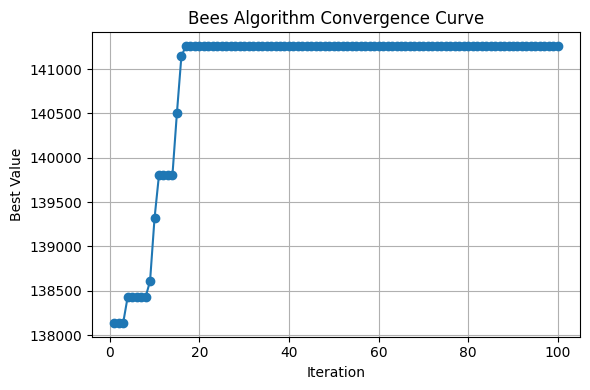


Runtime: 0.349 seconds
Best value found at iteration: 81
Run 2: Best = 141247, Iteration = 81, Runtime = 0.349s

Runtime: 0.351 seconds
Best value found at iteration: 7
Run 3: Best = 141258, Iteration = 7, Runtime = 0.351s

Runtime: 0.347 seconds
Best value found at iteration: 36
Run 4: Best = 141258, Iteration = 36, Runtime = 0.347s

Runtime: 0.349 seconds
Best value found at iteration: 80
Run 5: Best = 140618, Iteration = 80, Runtime = 0.349s

Runtime: 0.347 seconds
Best value found at iteration: 37
Run 6: Best = 141278, Iteration = 37, Runtime = 0.347s

Runtime: 0.351 seconds
Best value found at iteration: 26
Run 7: Best = 141258, Iteration = 26, Runtime = 0.351s

Runtime: 0.344 seconds
Best value found at iteration: 26
Run 8: Best = 141258, Iteration = 26, Runtime = 0.345s

Runtime: 0.345 seconds
Best value found at iteration: 76
Run 9: Best = 141278, Iteration = 76, Runtime = 0.346s

Runtime: 0.349 seconds
Best value found at iteration: 45
Run 10: Best = 141258, Iteration = 45, R

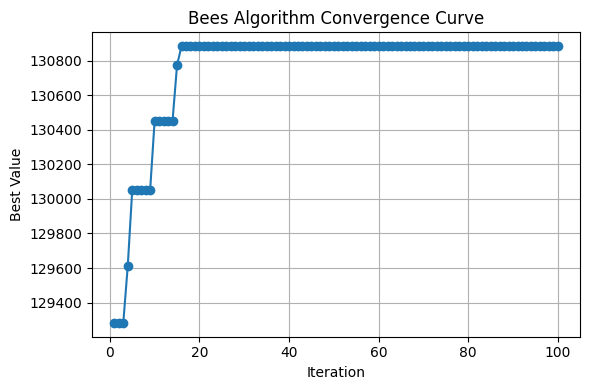


Runtime: 0.363 seconds
Best value found at iteration: 42
Run 2: Best = 130883, Iteration = 42, Runtime = 0.364s

Runtime: 0.362 seconds
Best value found at iteration: 20
Run 3: Best = 130723, Iteration = 20, Runtime = 0.363s

Runtime: 0.365 seconds
Best value found at iteration: 40
Run 4: Best = 130883, Iteration = 40, Runtime = 0.365s

Runtime: 0.370 seconds
Best value found at iteration: 7
Run 5: Best = 130883, Iteration = 7, Runtime = 0.370s

Runtime: 0.361 seconds
Best value found at iteration: 18
Run 6: Best = 130883, Iteration = 18, Runtime = 0.361s

Runtime: 0.366 seconds
Best value found at iteration: 24
Run 7: Best = 130883, Iteration = 24, Runtime = 0.366s

Runtime: 0.358 seconds
Best value found at iteration: 34
Run 8: Best = 130723, Iteration = 34, Runtime = 0.358s

Runtime: 0.366 seconds
Best value found at iteration: 61
Run 9: Best = 130773, Iteration = 61, Runtime = 0.367s

Runtime: 0.358 seconds
Best value found at iteration: 32
Run 10: Best = 130883, Iteration = 32, R

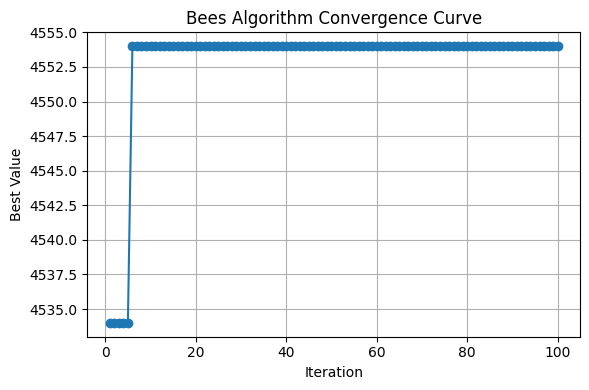


Runtime: 0.776 seconds
Best value found at iteration: 13
Run 2: Best = 4554, Iteration = 13, Runtime = 0.777s

Runtime: 0.769 seconds
Best value found at iteration: 7
Run 3: Best = 4554, Iteration = 7, Runtime = 0.769s

Runtime: 0.780 seconds
Best value found at iteration: 21
Run 4: Best = 4554, Iteration = 21, Runtime = 0.780s

Runtime: 0.762 seconds
Best value found at iteration: 11
Run 5: Best = 4554, Iteration = 11, Runtime = 0.762s

Runtime: 0.757 seconds
Best value found at iteration: 14
Run 6: Best = 4554, Iteration = 14, Runtime = 0.757s

Runtime: 0.763 seconds
Best value found at iteration: 9
Run 7: Best = 4554, Iteration = 9, Runtime = 0.763s

Runtime: 0.762 seconds
Best value found at iteration: 17
Run 8: Best = 4554, Iteration = 17, Runtime = 0.762s

Runtime: 0.786 seconds
Best value found at iteration: 12
Run 9: Best = 4554, Iteration = 12, Runtime = 0.786s

Runtime: 0.770 seconds
Best value found at iteration: 10
Run 10: Best = 4554, Iteration = 10, Runtime = 0.770s

---

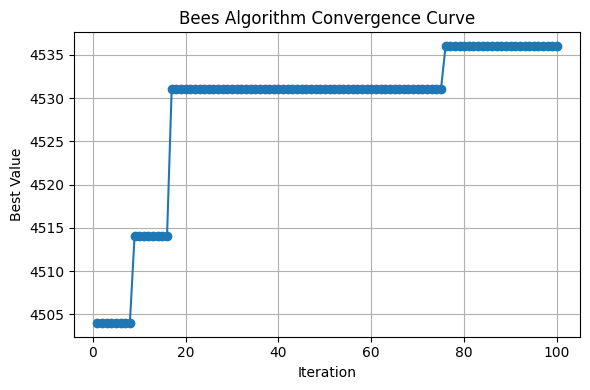


Runtime: 0.786 seconds
Best value found at iteration: 86
Run 2: Best = 4536, Iteration = 86, Runtime = 0.786s

Runtime: 0.765 seconds
Best value found at iteration: 21
Run 3: Best = 4536, Iteration = 21, Runtime = 0.765s

Runtime: 0.779 seconds
Best value found at iteration: 20
Run 4: Best = 4536, Iteration = 20, Runtime = 0.779s

Runtime: 0.802 seconds
Best value found at iteration: 18
Run 5: Best = 4536, Iteration = 18, Runtime = 0.802s

Runtime: 0.802 seconds
Best value found at iteration: 25
Run 6: Best = 4536, Iteration = 25, Runtime = 0.802s

Runtime: 0.782 seconds
Best value found at iteration: 15
Run 7: Best = 4536, Iteration = 15, Runtime = 0.783s

Runtime: 0.792 seconds
Best value found at iteration: 16
Run 8: Best = 4531, Iteration = 16, Runtime = 0.792s

Runtime: 0.983 seconds
Best value found at iteration: 24
Run 9: Best = 4531, Iteration = 24, Runtime = 0.983s

Runtime: 0.811 seconds
Best value found at iteration: 39
Run 10: Best = 4536, Iteration = 39, Runtime = 0.811s


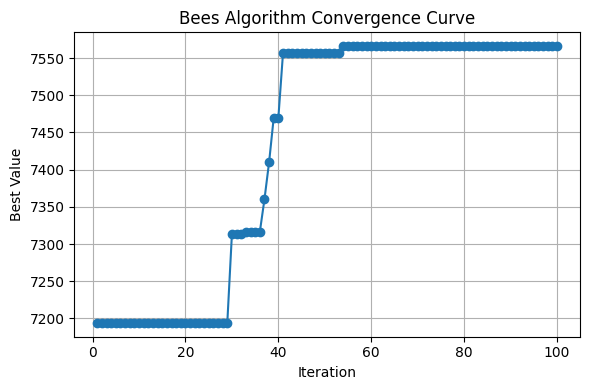


Runtime: 1.827 seconds
Best value found at iteration: 99
Run 2: Best = 7629, Iteration = 99, Runtime = 1.827s

Runtime: 1.854 seconds
Best value found at iteration: 96
Run 3: Best = 7331, Iteration = 96, Runtime = 1.854s

Runtime: 1.891 seconds
Best value found at iteration: 58
Run 4: Best = 7663, Iteration = 58, Runtime = 1.891s

Runtime: 1.878 seconds
Best value found at iteration: 56
Run 5: Best = 7371, Iteration = 56, Runtime = 1.878s

Runtime: 1.872 seconds
Best value found at iteration: 32
Run 6: Best = 7379, Iteration = 32, Runtime = 1.872s

Runtime: 1.844 seconds
Best value found at iteration: 68
Run 7: Best = 7621, Iteration = 68, Runtime = 1.844s

Runtime: 1.846 seconds
Best value found at iteration: 38
Run 8: Best = 7698, Iteration = 38, Runtime = 1.846s

Runtime: 1.886 seconds
Best value found at iteration: 87
Run 9: Best = 7449, Iteration = 87, Runtime = 1.886s

Runtime: 1.843 seconds
Best value found at iteration: 85
Run 10: Best = 7645, Iteration = 85, Runtime = 1.843s


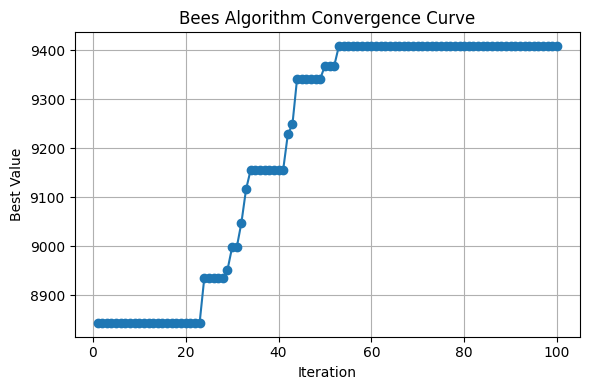


Runtime: 1.655 seconds
Best value found at iteration: 73
Run 2: Best = 9306, Iteration = 73, Runtime = 1.655s

Runtime: 1.675 seconds
Best value found at iteration: 36
Run 3: Best = 9326, Iteration = 36, Runtime = 1.675s

Runtime: 1.644 seconds
Best value found at iteration: 33
Run 4: Best = 9410, Iteration = 33, Runtime = 1.644s

Runtime: 1.650 seconds
Best value found at iteration: 61
Run 5: Best = 9382, Iteration = 61, Runtime = 1.650s

Runtime: 1.630 seconds
Best value found at iteration: 85
Run 6: Best = 9370, Iteration = 85, Runtime = 1.630s

Runtime: 1.672 seconds
Best value found at iteration: 99
Run 7: Best = 9312, Iteration = 99, Runtime = 1.672s

Runtime: 1.717 seconds
Best value found at iteration: 62
Run 8: Best = 9295, Iteration = 62, Runtime = 1.717s

Runtime: 1.730 seconds
Best value found at iteration: 82
Run 9: Best = 9323, Iteration = 82, Runtime = 1.730s

Runtime: 1.687 seconds
Best value found at iteration: 60
Run 10: Best = 9288, Iteration = 60, Runtime = 1.687s


In [25]:
import random
import json
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

class BeesAlgorithm:
  def __init__(self, values, weights, capacities, num_bees, num_onlookers, limit):

    if isinstance(weights[0], list):
      self.weights = weights
    else:
      self.weights = [weights]
    
    if isinstance(capacities, list):
      self.capacities = capacities
    else:
      self.capacities = [capacities]

    self.values = values
    self.n = len(values)
    self.m = len(self.capacities)
    self.num_bees = num_bees
    self.num_onlookers = num_onlookers
    self.limit = limit
    self.history = []

  def total_value(self, x):
    """Calculate total values of chosen items."""
    total = 0
    for i in range(self.n):
      total += self.values[i] * x[i]
    return total

  def total_weight(self, x):
    """Calculate total weights across all constraints of chosen items."""
    total = []
    for j in range(self.m):
      w = 0
      for i in range(self.n):
        w += self.weights[j][i] * x[i]
      total.append(w)
    return total

  def is_feasible(self, x):
    """Check if the solution is feasible within capacity."""
    loads = self.total_weight(x)
    for j in range(self.m):
      if loads[j] > self.capacities[j]:
        return False
    return True

  def random_solution(self):
    """Generate a random feasible solution and repair if necessary."""
    x = [random.randint(0, 1) for _ in range(self.n)]
    if not self.is_feasible(x):
      x = self.repair(x)
    return x
  
  def greedy_solution(self):
    """Generate a greedy feasible solution based on value/weight ratio."""
    ratios = [] 
    for i in range(self.n):
      w_sum = 0
      for j in range(self.m):
        w_sum += self.weights[j][i]
      if w_sum == 0:
        ratio = 0
      else:
        ratio = self.values[i] / w_sum
        ratios.append((ratio, i))
    
    # Take items from best ratio to worst, while keeping feasibility
    ratios.sort(reverse=True)
    x = [0]*self.n
    loads = [0]*self.m
    for _, i in ratios:
      # Try adding item i
      can_add = True
      for j in range(self.m):
        if loads[j] + self.weights[j][i] > self.capacities[j]:
          can_add = False
          break
      if can_add:
        x[i] = 1
        for j in range(self.m):
          loads[j] += self.weights[j][i]
    return x

  def repair(self, x):
    """Repair an infeasible solution by removing items with smallest value/weight ratio first."""
    total_w = self.total_weight(x)

    # Check if already feasible
    feasible = True
    for j in range(self.m):
      if total_w[j] > self.capacities[j]:
        feasible = False
        break
    if feasible:
      return x

    # Make a list of selected items with simple value/weight ratio
    items = []

    for i in range(self.n):
      if x[i] == 1:
        w_sum = 0
        for j in range(self.m):
          w_sum += self.weights[j][i]
        if w_sum == 0:
            ratio = 0
        else:
            ratio = self.values[i] / w_sum
        items.append((ratio, i))
    
    # Remove items with smallest ratio first
    items.sort()
    for ratio, i in items:
      total_w = self.total_weight(x)
      over = False
      for j in range(self.m):
        if total_w[j] > self.capacities[j]:
          over = True
          break
      if not over:
        break
      x[i] = 0
    return x

  def fitness(self, x, penalty=200):
    """Calculate fitness with penalty for infeasibility."""
    total_v = self.total_value(x)
    total_w = self.total_weight(x)

    over = 0
    for j in range (self.m):
      if total_w[j]> self.capacities[j]:
        over += (total_w[j] - self.capacities[j])
    
    if over == 0:
      return total_v
    else:
      return total_v - penalty * over

  def initialize_population(self):
      """Initialize population with one greedy solution and rest random."""
      population = []
      g = self.greedy_solution()
      population.append(g)
      # Fill the rest with random solutions
      for _ in range(self.num_bees - 1):
        x = self.random_solution()
        population.append(x)
      return population

  def neighbor(self, x):
    """Generate a neighbor solution by two independent random 1-bit flips."""
    
    # First random 1-bit flip
    y1 = x[:]
    i = random.randint(0, self.n - 1)
    y1[i] = 1 - y1[i]
    if not self.is_feasible(y1):
      y1 = self.repair(y1)

    # Second random 1-bit flip
    y2 = x[:]
    j = random.randint(0, self.n - 1)
    y2[j] = 1 - y2[j]
    if not self.is_feasible(y2):
      y2 = self.repair(y2)

    # Return the better of the two neighbors
    return y1 if self.fitness(y1) >= self.fitness(y2) else y2

  def employed_bee_phase(self, population, trials):
    """Each employed bee searches for a better solution near its current one."""
    for i in range(len(population)):
      y = self.neighbor(population[i])
      fit_y = self.fitness(y)
      fit_x = self.fitness(population[i])
      # If the neighbor is better or equally good, but simpler, keep it
      if fit_y > fit_x or (fit_y == fit_x and sum(y) < sum(population[i])):
        population[i] = y
        trials[i] = 0
      else:
        trials[i] += 1
    return population, trials

  def onlooker_bee_phase(self, population, trials):
    """Onlooker bees choose source bees based on fitness probabilities and search for neighbors."""

    # Calculate fitness values for all solutions
    fitness_values = [self.fitness(x) for x in population]

    # Make all fitness values non-negative (important for infeasible solutions)
    min_fit = min(fitness_values)
    if min_fit < 0:
      fitness_values = [f - min_fit +1 for f in fitness_values]
    
    total_fit = sum(fitness_values)

    # Calculate selection probabilities
    if total_fit == 0:
      probabilities = [1 / len(fitness_values)] * len(fitness_values)
    else:
      probabilities = [f / total_fit for f in fitness_values]
    
    # Onlooker bees select source bees and search for neighbors
    for _ in range(self.num_onlookers):
      r = random.random()
      running_total = 0
      for i, p in enumerate(probabilities):
        running_total += p
        if r <= running_total:
          y = self.neighbor(population[i])
          if self.fitness(y) > self.fitness(population[i]):
            population[i] = y
            trials[i] = 0
          else:
            trials[i] += 1
          break
    return population, trials

  def scout_bee_phase(self, population, trials):
    """Replace bees that haven't improved for a while with new random solutions"""
    for i in range(len(population)):
      if trials[i] >= self.limit:
        population[i] = self.random_solution()
        trials[i] = 0
    return population, trials

  def run(self, iterations):
    """Run the Bees Algorithm for a specified number of iterations."""
    start_time = datetime.datetime.now()
    population = self.initialize_population()
    trials = [0]*len(population)
    best = max(population, key=self.fitness)
    best_iteration = 0

    for t in range(iterations):
      population, trials = self.employed_bee_phase(population, trials)
      population, trials = self.onlooker_bee_phase(population, trials)
      population, trials = self.scout_bee_phase(population, trials)
      current_best=max(population, key=self.fitness)
      avg_fit = np.mean([self.fitness(x) for x in population])
      if self.fitness(current_best) > self.fitness(best):
        best = current_best
        best_iteration = t + 1

      self.history.append((t+1, self.fitness(best), avg_fit))
      #print(f"Iteration {t+1}: best value = {self.fitness(best)}")

    end_time = datetime.datetime.now()
    runtime = (end_time - start_time).total_seconds()
    print(f"\nRuntime: {runtime:.3f} seconds")
    print(f"Best value found at iteration: {best_iteration}")
    return best

  def plot_convergence(self):
    if not self.history:
      print("No convergence data to plot.")
      return
  
    iterations = [row[0] for row in self.history]
    best_values = [row[1] for row in self.history]
    plt.figure(figsize=(6, 4))
    plt.plot(iterations, best_values, marker="o", linewidth=1.5)
    plt.title("Bees Algorithm Convergence Curve")
    plt.xlabel("Iteration")
    plt.ylabel("Best Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def pad_weights(weights_2d, n):
  """Pad each weight list to length n."""
  padded = []
  for w in weights_2d:
    if len(w) < n:
      w = w + [0] * (n - len(w))  
    elif len(w) > n:
      w = w[:n]                    
    padded.append(w)
  return padded

def evaluate_all_datasets(datasets, runs):
    """Run the Bees Algorithm on all datasets and summarize the results"""
    summary = []
    for name, data in datasets.items():
        print(f"\n--- Running dataset: {name} ---")

        values = data["values"]
        weights = pad_weights(data["weights"], len(values))
        capacities = data["capacities"]
        optimal = data["optimal"]

        best_values = []
        runtimes = []
        best_iterations = []
        avg_fitnesses = []

        for seed in range(runs):
            random.seed(seed)
            algo = BeesAlgorithm(values, weights, capacities,
                                 num_bees=60, num_onlookers=25, limit=20)
            start = datetime.datetime.now()
            best_solution = algo.run(iterations=100)
            assert algo.is_feasible(best_solution), f"Infeasiible solution in {name}"
            end = datetime.datetime.now()
            runtime = (end - start).total_seconds()

            best_val = algo.total_value(best_solution)
            avg_fit = algo.history[-1][2] if algo.history else best_val
            best_iteration = max(algo.history, key=lambda x: x[1])[0]
            weight_used = algo.total_weight(best_solution)
            baseline = algo.total_value(algo.greedy_solution())

            best_values.append(best_val)
            runtimes.append(runtime)
            best_iterations.append(best_iteration)
            avg_fitnesses.append(avg_fit)

            print(f"Run {seed+1}: Best = {best_val}, Iteration = {best_iteration}, Runtime = {runtime:.3f}s")

            if seed == 0:
                algo.plot_convergence()

        best_overall = max(best_values)
        avg_best = round(statistics.mean(best_values), 2)
        std_best = round(statistics.stdev(best_values), 2)
        avg_runtime = round(statistics.mean(runtimes), 3)
        avg_iteration_best = int(round(statistics.mean(best_iterations)))
        avg_fit = round(statistics.mean(avg_fitnesses), 2)
        improvement = round(best_overall / optimal * 100, 2)
        final_best_value = algo.history[-1][1] if algo.history else best_overall
        first_best_value = algo.history[0][1] if algo.history else best_overall
        convergence_trend = round(final_best_value - first_best_value, 2)


        summary.append({
            "Instance": name,
            "Items (n)": len(values),
            "Knapsacks": len(capacities),
            "Capacity (W)": capacities if len(capacities) > 1 else capacities[0],
            "BestValue": best_overall,
            "WeightUsed": weight_used,
            "BaselineValue": baseline,
            "Achieved(%)": improvement,
            "Optimal": optimal,
            "AvgBest": avg_best,
            "StdDev": std_best,
            "Runtime": avg_runtime,
            "BestIteration": avg_iteration_best,
            "AvgFitness": avg_fit,
            "ConvergenceTrend": convergence_trend,
            "FinalBest": final_best_value
        })

    print("\n Summary of All Datasets")
    df = pd.DataFrame(summary)
    print(df.to_string(index=False))
    return df

with open("mknap_2.json", "r") as f:
    datasets = json.load(f)

if __name__ == "__main__":
    df_results = evaluate_all_datasets(datasets, runs=10)


# Solving a Real-World Problem Using Reinforcement Learning

## Understanding the environment
- Instatiate FrozenLake-v1 and print state and action spaces
- Visualize the grid and annotate S (start), G (goal), and H (holes)
- Explain the reward structure and the effect of **slippery=True**

In [27]:
import numpy as np
import gymnasium as gym
from tqdm import tqdm
import matplotlib.pyplot as plt
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

In [28]:
# ----------------------------
# Hyperparameters
# ----------------------------
TOTAL_EPISODES = 15000
LEARNING_RATE = 0.8
DISCOUNT_FACTOR = 0.95
EPSILON_START = 1.0
EPSILON_END = 0.01
EPSILON_EXPONENTIAL_DECAY = 0.999
EPSILON_LINEAR_DECAY = 0.01
N_RUNS = 20
MAP_SIZE = 6

In [29]:
# ----------------------------
# Environment Setup
# ----------------------------
env = gym.make(f"FrozenLake-v1", is_slippery=True, render_mode="ansi", desc=generate_random_map(size=MAP_SIZE, p=0.9, seed=None))
N_STATES = env.observation_space.n
N_ACTIONS = env.action_space.n


print(f"Environment: FrozenLake {MAP_SIZE}")
print(f"States: {N_STATES}, Actions: {N_ACTIONS}")

Environment: FrozenLake 6
States: 36, Actions: 4


In [30]:
class Qlearning:
    def __init__(self, learning_rate, state_size, action_size, discount_factor):
        self.lr = learning_rate
        self.df = discount_factor
        self.state_size = state_size
        self.action_size = action_size
        self.qtable = np.zeros((state_size, action_size))

    def reset_qtable(self):
        self.qtable = np.zeros((self.state_size, self.action_size))

    def update(self, state, action, reward, new_state):
        best_next_action = np.argmax(self.qtable[new_state])
        td_target = reward + self.df * self.qtable[new_state, best_next_action]
        td_error = td_target - self.qtable[state, action]
        self.qtable[state, action] += self.lr * td_error
        return self.qtable[state, action]


# ----------------------------
# Epsilon-greedy Policy
# ----------------------------
class GreedyEpsilon:
  def __init__(self, epsilon):
    self.epsilon = epsilon
    
  def select_action(self, action_space, state, qtable):
      if np.random.rand() < self.epsilon:
        return action_space.sample()
      else:
        max_ids = np.where(qtable[state] == qtable[state].max())[0]
        #print("Max IDs:", max_ids)
        return np.random.choice(max_ids)


# ----------------------------
# Training Loop
# ----------------------------
def run_exponential(env, learner, policy, total_episodes, n_runs):
    rewards = np.zeros((total_episodes, n_runs))
    steps = np.zeros((total_episodes, n_runs))
    episodes = np.arange(total_episodes)
    qtables = np.zeros((n_runs, learner.state_size, learner.action_size))
    all_states, all_actions = [], []

    for run in range(n_runs):
        learner.reset_qtable()
        env.reset(seed=42 + run)
        epsilon = EPSILON_START

        for episode in tqdm(episodes, desc=f"Run {run+1}/{n_runs}", leave=False):
            state, _ = env.reset()
            done = False
            step = 0
            total_reward = 0

            # set current epsilon
            policy.epsilon = max(EPSILON_END, epsilon)

            while not done:
                action = policy.select_action(env.action_space, state, learner.qtable)
                all_states.append(state)
                all_actions.append(action)

                new_state, reward, terminated, truncated, info = env.step(action)
                done = terminated or truncated

                learner.update(state, action, reward, new_state)
                total_reward += reward
                step += 1
                state = new_state

            # log
            rewards[episode, run] = total_reward
            steps[episode, run] = step
            epsilon *= EPSILON_EXPONENTIAL_DECAY  # decay after each episode

        qtables[run] = learner.qtable

    return rewards, steps, episodes, qtables, all_states, all_actions



  
def run_linear(env, learner, policy, total_episodes, n_runs):
    rewards = np.zeros((total_episodes, n_runs))
    steps = np.zeros((total_episodes, n_runs))
    episodes = np.arange(total_episodes)
    qtables = np.zeros((n_runs, learner.state_size, learner.action_size))
    all_states, all_actions = [], []

    for run in range(n_runs):
        learner.reset_qtable()
        env.reset(seed=42 + run)
        epsilon = EPSILON_START

        for episode in tqdm(episodes, desc=f"Run {run+1}/{n_runs}", leave=False):
            state, _ = env.reset()
            done = False
            step = 0
            total_reward = 0

            # set current epsilon
            policy.epsilon = max(EPSILON_END, epsilon)

            while not done:
                action = policy.select_action(env.action_space, state, learner.qtable)
                all_states.append(state)
                all_actions.append(action)

                new_state, reward, terminated, truncated, info = env.step(action)
                done = terminated or truncated

                learner.update(state, action, reward, new_state)
                total_reward += reward
                step += 1
                state = new_state

            # log
            rewards[episode, run] = total_reward
            steps[episode, run] = step
            epsilon -= EPSILON_LINEAR_DECAY  # decay after each episode

        qtables[run] = learner.qtable

    return rewards, steps, episodes, qtables, all_states, all_actions

In [31]:
config = {
    1: {
        "TOTAL_EPISODES": 15000,
       "LEARNING_RATE": 0.8,
        "DISCOUNT_FACTOR": 0.95,
        "EPSILON_START": 1.0,
        "EPSILON_END": 0.01,
        "EPSILON_DECAY": 0.999,
        "N_RUNS": 20,
        "MAP_SIZE": 6
        },
    2: {
        "TOTAL_EPISODES": 20000,
        "LEARNING_RATE": 0.8,
        "DISCOUNT_FACTOR": 0.95,
        "EPSILON_START": 1.0,
        "EPSILON_END": 0.01,
        "EPSILON_DECAY": 0.999,
        "N_RUNS": 20,
        "MAP_SIZE": 8 
        }
    }

In [32]:
results = {}

for cfg_id, cfg in config.items():
  env = gym.make("FrozenLake-v1",
               is_slippery=True,
               render_mode="ansi",
               desc=generate_random_map(size=cfg["MAP_SIZE"], seed=42+cfg_id))
  env.reset()
  print(env.render())

  N_ACTIONS = env.action_space.n
  N_STATES = env.observation_space.n
  print(f"Environment: FrozenLake {cfg['MAP_SIZE']}")
  print(f"States: {N_STATES}, Actions: {N_ACTIONS}")


  learner = Qlearning(
      learning_rate=cfg["LEARNING_RATE"],
      state_size=N_STATES,
      action_size=N_ACTIONS,
      discount_factor=cfg["DISCOUNT_FACTOR"]
  )

  policy = GreedyEpsilon(epsilon=cfg["EPSILON_START"])

  rewards, steps, episodes, qtables, all_states, all_actions = run_linear(
      env,
      learner,
      policy,
      total_episodes=cfg["TOTAL_EPISODES"],
      n_runs=cfg["N_RUNS"]
  )


  success_rate = np.sum(rewards > 0) / rewards.size

  results[cfg_id] = {
      "success_rate": success_rate,
      "rewards": rewards,
      "steps": steps,
      "episodes": episodes,
      "qtables": qtables,
      "all_states": all_states,
      "all_actions": all_actions
  }

  env.close()

  


SFFHFF
FFFFHH
FFFFFH
HFFHFH
HFFFFF
FFFFFG

Environment: FrozenLake 6
States: 36, Actions: 4



SFFHFHFF
FFHFHHFF
FHFFFHFF
FFHFFFFF
FFFFHFFF
HFFHFHHF
FFFFFFFF
HFFFFFFG

Environment: FrozenLake 8
States: 64, Actions: 4


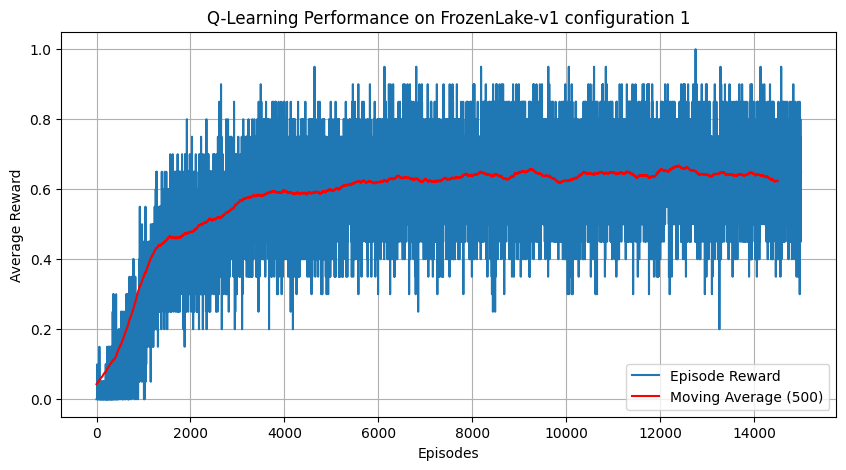

Configuration 1 - Success Rate: 56.75%


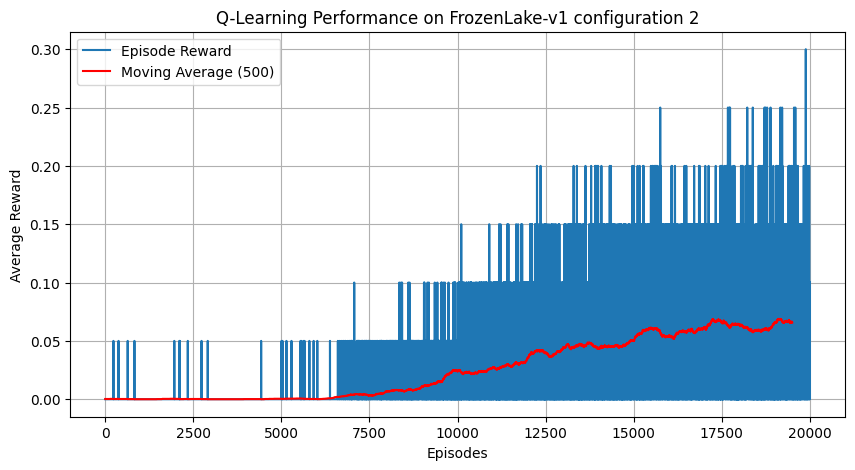

Configuration 2 - Success Rate: 2.53%


In [33]:
window = 500
for idx, res in results.items():
  mean_rewards = np.mean(res["rewards"], axis=1)
  moving_avg = np.convolve(mean_rewards, np.ones(window)/window, mode="valid")
  plt.figure(figsize=(10, 5))
  plt.plot(mean_rewards, label="Episode Reward")
  plt.plot(np.arange(len(moving_avg)), moving_avg, color='red', label=f"Moving Average ({window})")
  plt.xlabel("Episodes")
  plt.ylabel("Average Reward")
  plt.title(f"Q-Learning Performance on FrozenLake-v1 configuration {idx}")
  plt.legend()
  plt.grid(True)
  plt.show()

  print(f"Configuration {idx} - Success Rate: {res['success_rate']*100:.2f}%")